In [105]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from heatmap import *
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas_profiling
from scipy.optimize import curve_fit


data = pd.read_csv("../summary/newData1.tsv",
sep="\t",
dtype={'Pop':'str', 'Run':'int', 'Gen':'int', 'preAPref':'float', 'preIPref':'float', 'preOPref':'float', 'Matings':'float','Contacts':'float', 'MMContacts':'float', 'MalF':'float', 'FemF':'float', 'APref':'float', 'IPref':'float', 'OPref':'float','migrations':'float', 'A':'float', 'I':'float', 'O':'float', 'M':'float', 'F':'float', 'T':'float', 'matingSuccess':'float', 'misIdent':'float'})
data.fillna(value=0, inplace=True)
#data = data.drop(data[data["Run"]==400].index)
data = data[data["Run"] != 602]
data = data[data["Pop"] != "Total"]

data["maleRatio"] = data["M"]/data["T"]
data.rename(index=str, columns={"T":"Total"}, inplace=True)
data.set_index(["Pop", "Run", "Gen"], inplace=True)



In [116]:
pops = data.groupby("Pop")

finals = data.iloc[data.index.get_level_values('Gen')==100]

finalPops = finals.groupby("Pop")
for pop, popData in pops:
    print(pop, popData["Total"].max(), popData["Total"].min(), popData["Total"].mean())
    
finals.describe()

1 516.0 100.0 433.7594
2 516.0 100.0 435.1914
3 501.0 100.0 419.2207
4 500.0 100.0 419.8708
5 500.0 100.0 372.8431
6 505.0 100.0 421.5675
7 505.0 100.0 421.496
8 510.0 100.0 427.3398


preAPref  preIPref  preOPref           A           I           O  \
count     800.0     800.0     800.0  800.000000  800.000000  800.000000   
mean        1.0       1.0       1.0    0.148773    0.428534    0.422693   
std         0.0       0.0       0.0    0.328329    0.385771    0.384155   
min         1.0       1.0       1.0    0.000000    0.000000    0.000000   
25%         1.0       1.0       1.0    0.000000    0.000000    0.000000   
50%         1.0       1.0       1.0    0.000000    0.456448    0.447467   
75%         1.0       1.0       1.0    0.060345    0.733707    0.706665   
max         1.0       1.0       1.0    1.000000    1.000000    1.000000   

                M           F       Total        MFer  ...      OMSucc  \
count  800.000000  800.000000  800.000000  800.000000  ...  800.000000   
mean   207.858750  210.105000  417.963750    0.541721  ...    0.184529   
std     20.893287   21.062491   36.760565    0.031818  ...    0.143649   
min     85.000000   89.000000  179.000000    0.464320  ...    0.000000   
25%    196.750000  199.000000  400.000000    0.523928  ...    0.000000   
50%    209.000000  212.000000  423.000000    0.538373  ...    0.287265   
75%    222.000000  224.000000  441.250000    0.555058  ...    0.297549   
max    258.000000  258.000000  499.000000    0.779470  ...    0.362900   

            OSurv     Matings     Contacts  Deaths        APref         IPref  \
count  800.000000  800.000000   800.000000   800.0   800.000000    800.000000   
mean     0.623750  605.232500  1736.966250     0.0    66.854708   1750.865437   
std      0.484747  116.696791   355.089328     0.0   232.912261   2847.948971   
min      0.000000  194.000000   469.000000     0.0     0.665264      1.000000   
25%      0.000000  551.000000  1578.750000     0.0     0.734122      1.000000   
50%      1.000000  622.000000  1799.000000     0.0     0.764593    524.171597   
75%      1.000000  688.000000  1981.250000     0.0     1.026529   2487.623327   
max      1.000000  872.000000  2595.000000     0.0  2855.285851  24486.635985   

              OPref  matingSuccess   maleRatio  
count    800.000000     800.000000  800.000000  
mean    1755.890350       0.349778    0.497317  
std     3059.725674       0.012753    0.024239  
min        1.000000       0.319742    0.424479  
25%        1.000000       0.341209    0.480552  
50%      547.368412       0.348635    0.497792  
75%     2460.059107       0.357364    0.513258  
max    45281.417582       0.416058    0.567929  

[8 rows x 32 columns]

In [118]:
finals.profile_report()

preAPref  preIPref  preOPref        A             I             O  \
count   35871.0   35871.0   35871.0  35871.0  35871.000000  35871.000000   
mean        1.0       1.0       1.0      0.0      0.502831      0.497169   
std         0.0       0.0       0.0      0.0      0.392698      0.392698   
min         1.0       1.0       1.0      0.0      0.000000      0.000000   
25%         1.0       1.0       1.0      0.0      0.000000      0.000000   
50%         1.0       1.0       1.0      0.0      0.502370      0.497630   
75%         1.0       1.0       1.0      0.0      1.000000      1.000000   
max         1.0       1.0       1.0      0.0      1.000000      1.000000   

                  M             F         Total          MFer  ...  \
count  35871.000000  35871.000000  35871.000000  35871.000000  ...   
mean     213.517270    213.546375    427.063645      0.546258  ...   
std       19.169194     19.215833     32.483520      0.029394  ...   
min       50.000000     50.000000    100.000000      0.464963  ...   
25%      203.000000    203.000000    411.000000      0.529650  ...   
50%      214.000000    214.000000    429.000000      0.544653  ...   
75%      225.000000    225.000000    446.000000      0.559792  ...   
max      283.000000    275.000000    516.000000      0.864182  ...   

             OMSucc         OSurv       Matings      Contacts   Deaths  \
count  35871.000000  35871.000000  35871.000000  35871.000000  35871.0   
mean       0.204770      0.695855    649.638733   1881.952747      0.0   
std        0.135620      0.460051     87.307460    265.757068      0.0   
min        0.000000      0.000000     65.000000    160.000000      0.0   
25%        0.000000      0.000000    597.000000   1720.000000      0.0   
50%        0.288631      1.000000    650.000000   1882.000000      0.0   
75%        0.297406      1.000000    704.000000   2047.000000      0.0   
max        0.353542      1.000000    982.000000   2900.000000      0.0   

              APref         IPref         OPref  matingSuccess     maleRatio  
count  35871.000000  35871.000000  35871.000000   35871.000000  35871.000000  
mean       0.743013   2199.938669   2157.598593       0.345709      0.499974  
std        0.036004   3360.727219   3290.629565       0.010660      0.024060  
min        0.623189      1.000000      1.000000       0.309436      0.365482  
25%        0.721496      1.000000      1.000000       0.338447      0.483709  
50%        0.742745    839.599533    793.898949       0.345368      0.500000  
75%        0.762388   3229.778857   3161.684493       0.352651      0.516204  
max        0.991771  58559.907399  58629.509760       0.425000      0.610860  

[8 rows x 32 columns]

In [147]:
useData = data[(data["A"]!=0) & (data["A"] != 1)]

def sigmoSym(x, Lambda, mult):
    f= 2*np.abs(x)-1
    f=(np.sign(f)*(np.abs(f)**Lambda)+1)/2
    f=(1-np.sin(np.pi*f/2)**2)*mult
    return f

def sigmoCurve(x, stiffness, inflexion, mult):
    aInfl = 1/inflexion
    t=aInfl * x / (1+aInfl*x)
    f=sigmoSym(t, stiffness, mult)
    return(f)
popt, pcov = curve_fit(sigmoCurve, xdata=useData["A"], ydata=useData["AFec"], p0=[0.5, 0.5, useData["AFec"].median()], bounds=([0,0,0], [1,1,500]))
print(popt)
predFec = useData["A"].apply(sigmoCurve, args=tuple(popt))
predFec.describe()

[  0.4670538    1.         219.54395981]


count    34129.000000
mean       212.298986
std          9.010989
min        148.135955
25%        209.436030
50%        215.652548
75%        218.594597
max        219.542191
Name: A, dtype: float64

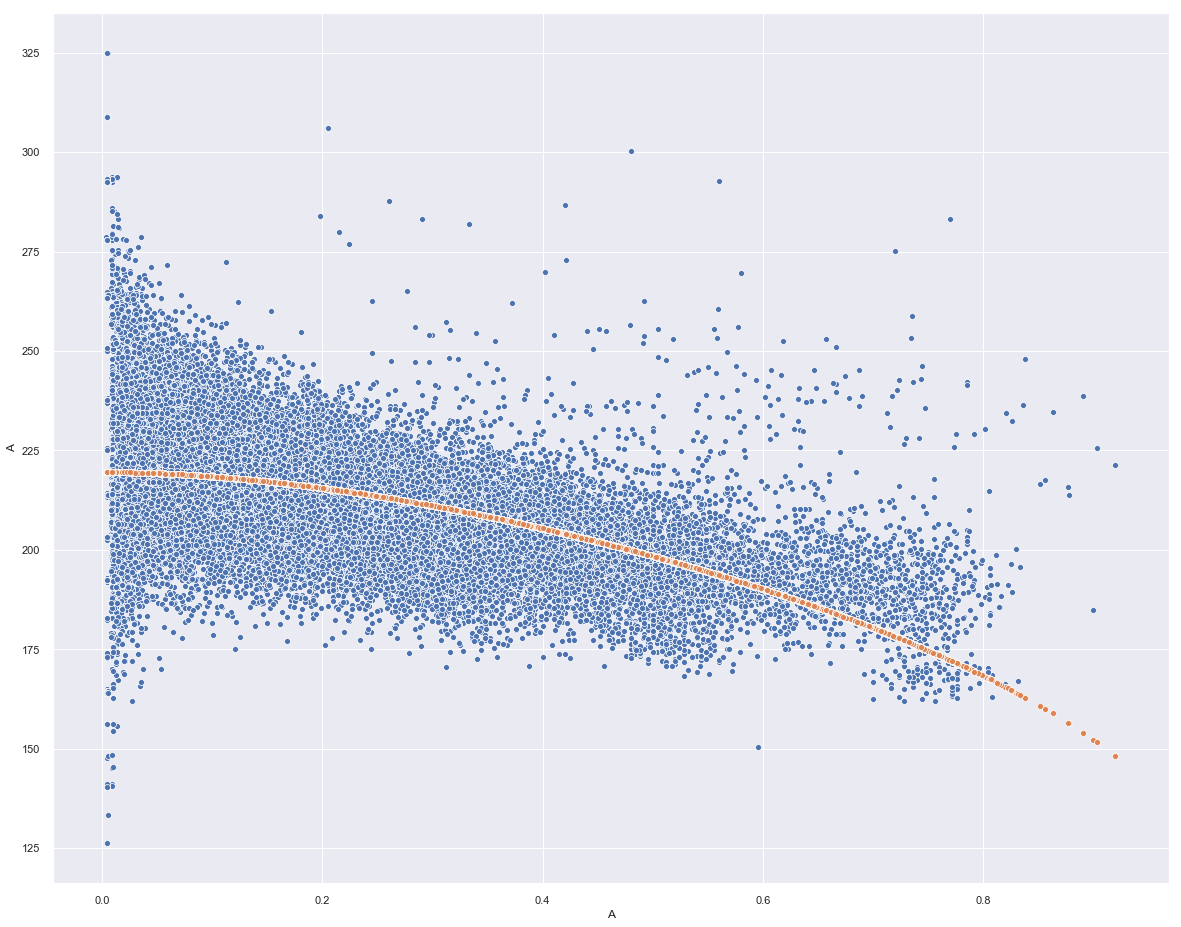

In [148]:
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1=sns.scatterplot(x="A", y="AFec", data=useData, ax=axarr)
plot2 = sns.scatterplot(x=useData["A"], y=predFec, ax=axarr)

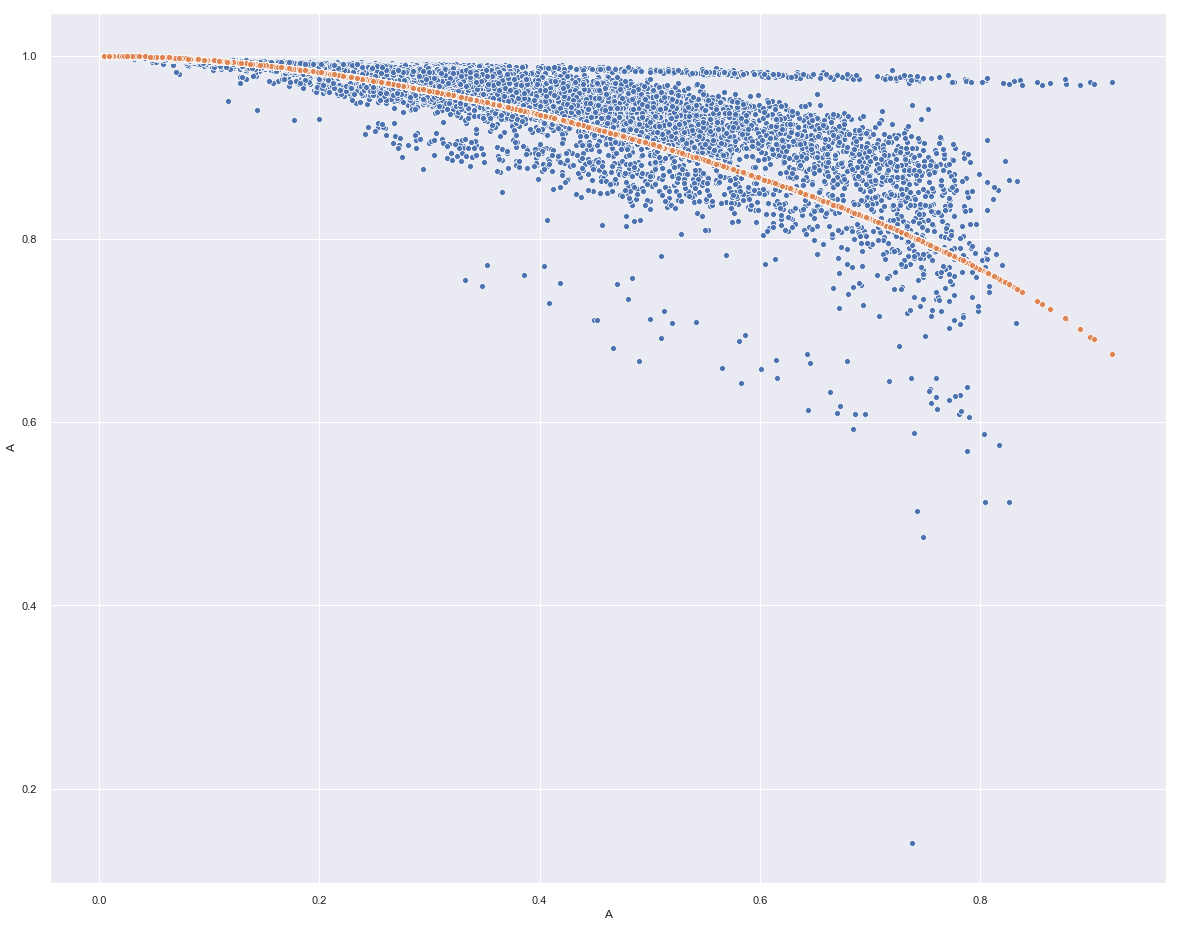

In [157]:
test = 1-(useData["A"]*(useData["APref"]/useData["APref"].max()))**0.5
regFec = useData["A"].apply(sigmoCurve, args=(popt[0], popt[1],1))
fig, ax = plt.subplots(figsize=(20,16))
plot2 = sns.scatterplot(x=useData["A"], y=test, ax=ax)
plot1 = sns.scatterplot(x=useData["A"], y=regFec, ax=ax)


In [124]:
useData = data[(data["I"]!=0) & (data["I"] !=1)]

popt, pcov = curve_fit(sigmoCurve, xdata=useData["I"], ydata=useData["IFec"], p0=[0.5, 1, useData["IFec"].median()], bounds=([0,0,0], [1,10,500]))
print(popt)
predFec = useData["I"].apply(sigmoCurve, args=tuple(popt))
predFec.describe()

[  1.           2.90247743 212.69161069]


count    39083.000000
mean       199.408928
std          6.830472
min        180.236187
25%        196.342592
50%        200.889963
75%        204.162860
max        212.686304
Name: I, dtype: float64

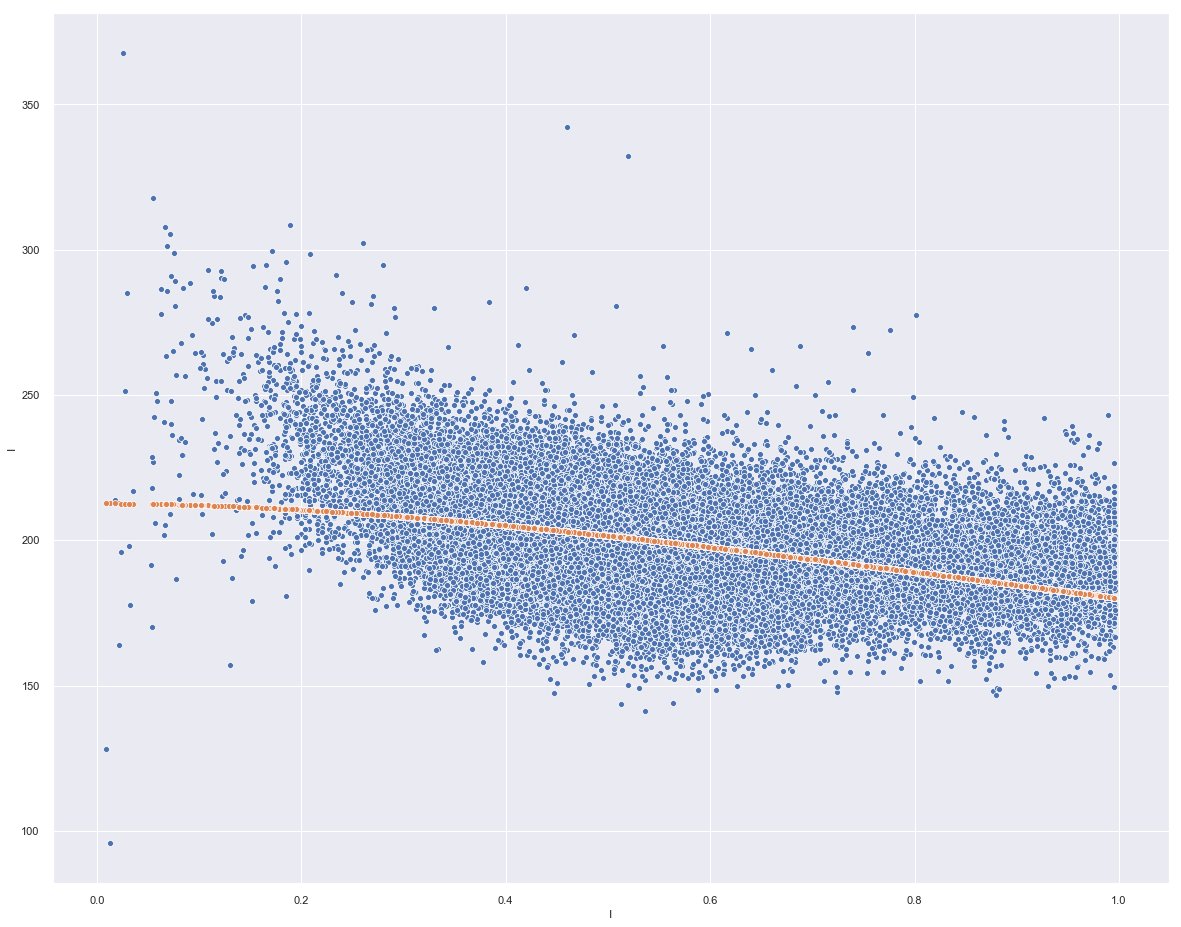

In [125]:
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1=sns.scatterplot(x="I", y="IFec", data=useData, ax=axarr)
plot2 = sns.scatterplot(x=useData["I"], y=predFec, ax=axarr)

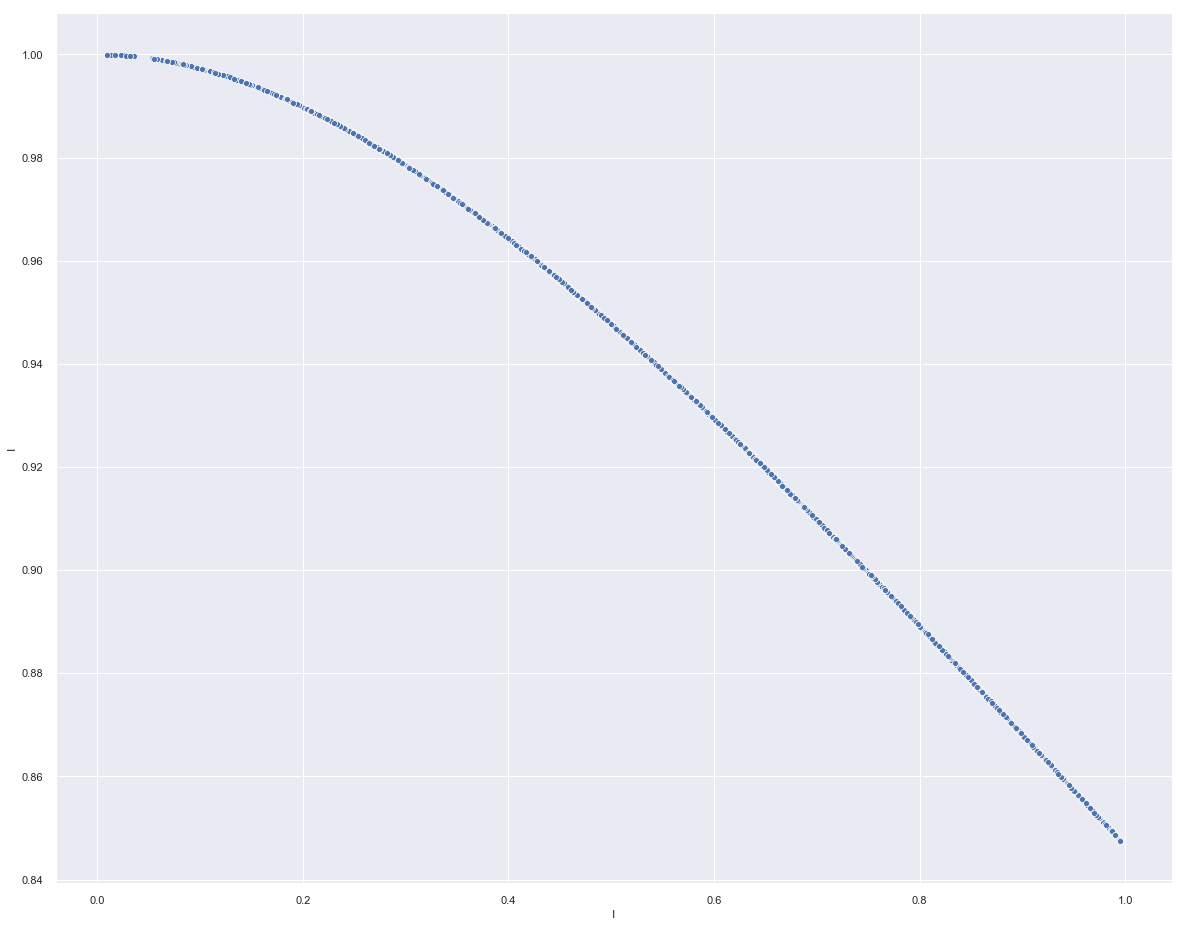

In [126]:
regFec = useData["I"].apply(sigmoCurve, args=(popt[0], popt[1],1))
fig, ax = plt.subplots(figsize=(20,16))
plot1 = sns.scatterplot(x=useData["I"], y=regFec, ax=ax)

In [127]:
useData = data[(data["O"]!=0) & (data["O"]!=1)]


popt, pcov = curve_fit(sigmoCurve, xdata=useData["O"], ydata=useData["OFec"], p0=[0.5, 1, useData["OFec"].median()], bounds=([0,0,0], [1,2,500]))
print(popt)
predFec = useData["O"].apply(sigmoCurve, args=tuple(popt))
predFec.describe()

[  1.           1.81818863 231.48605126]


count    39193.000000
mean       205.447216
std         15.746512
min        167.005728
25%        197.706394
50%        206.964630
75%        215.573901
max        231.483040
Name: O, dtype: float64

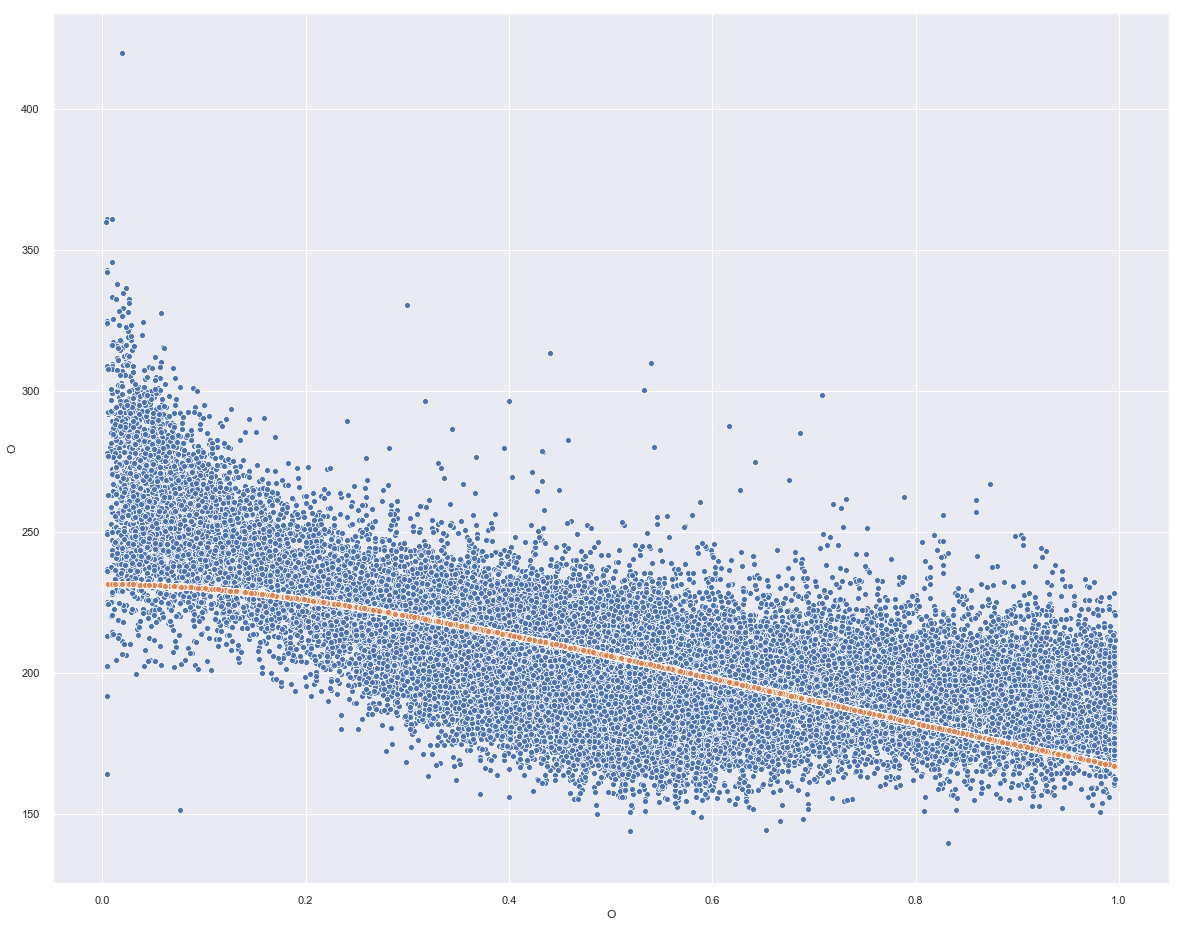

In [128]:
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1=sns.scatterplot(x="O", y="OFec", data=useData, ax=axarr)
plot2 = sns.scatterplot(x=useData["O"], y=predFec, ax=axarr)

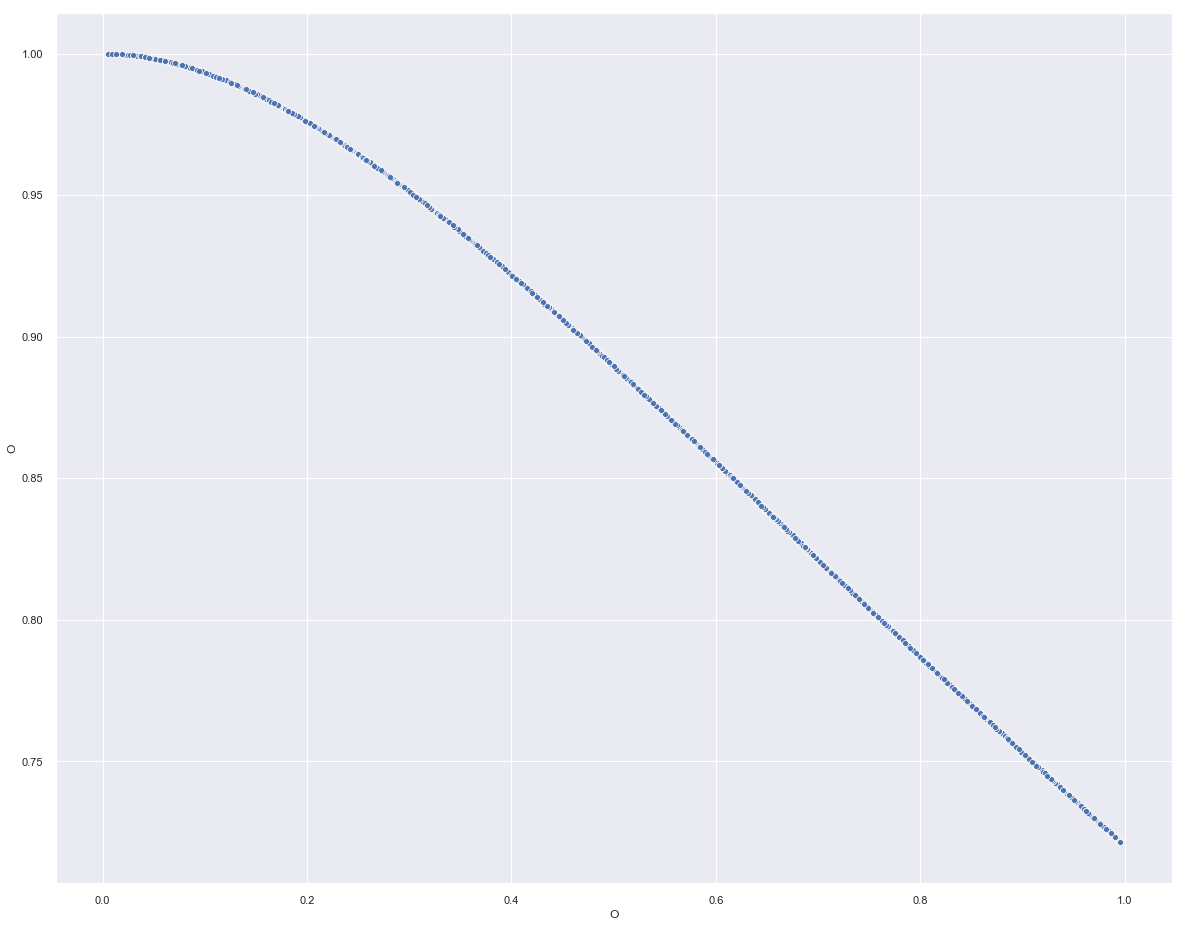

In [129]:
regFec = useData["O"].apply(sigmoCurve, args=(popt[0], popt[1],1))
fig, ax = plt.subplots(figsize=(20,16))
plot1 = sns.scatterplot(x=useData["O"], y=regFec, ax=ax)

In [158]:
def sigmoSym(x, Lambda, mult):
    f= 2*np.abs(x)-1
    f=(np.sign(f)*(np.abs(f)**Lambda)+1)/2
    f=(np.sin(np.pi*f/2)**2)*mult
    return f

useData = data[(data["A"]!=0) & (data["A"] != 1)]
popt, pcov = curve_fit(sigmoCurve, xdata=useData["A"], ydata=useData["APref"], p0=[0.5, 0.5, useData["APref"].median()], bounds=([0,0,0], [1,1,np.inf]))
print(popt)
predFec = useData["A"].apply(sigmoCurve, args=tuple(popt))
predFec.describe()

[4.01901330e-01 6.63182076e-01 4.05231303e+02]


count    34129.000000
mean        27.025032
std         47.905984
min          0.005491
25%          2.893356
50%         11.776061
75%         31.048112
max        341.580489
Name: A, dtype: float64

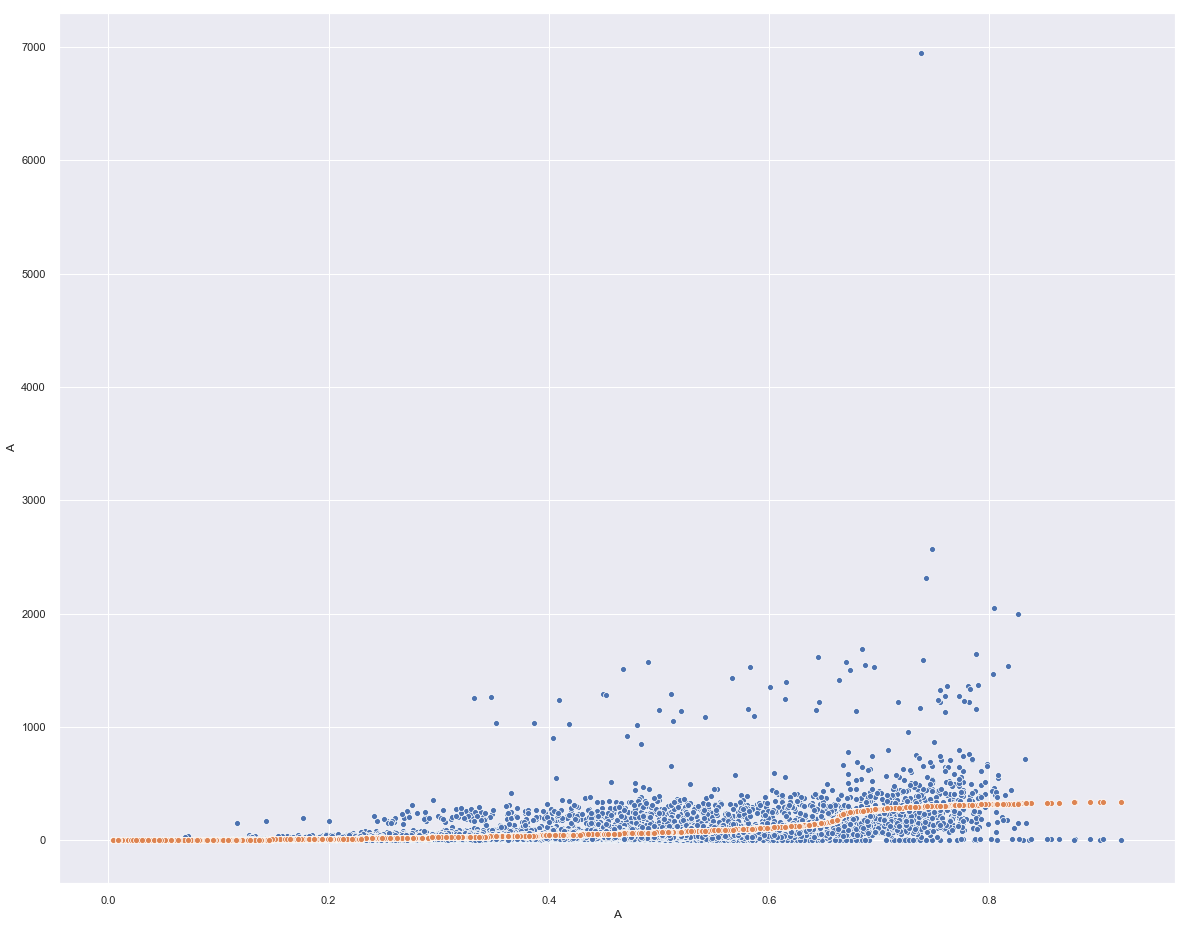

In [159]:
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1=sns.scatterplot(x="A", y="APref", data=useData, ax=axarr)
plot2 = sns.scatterplot(x=useData["A"], y=predFec, ax=axarr)

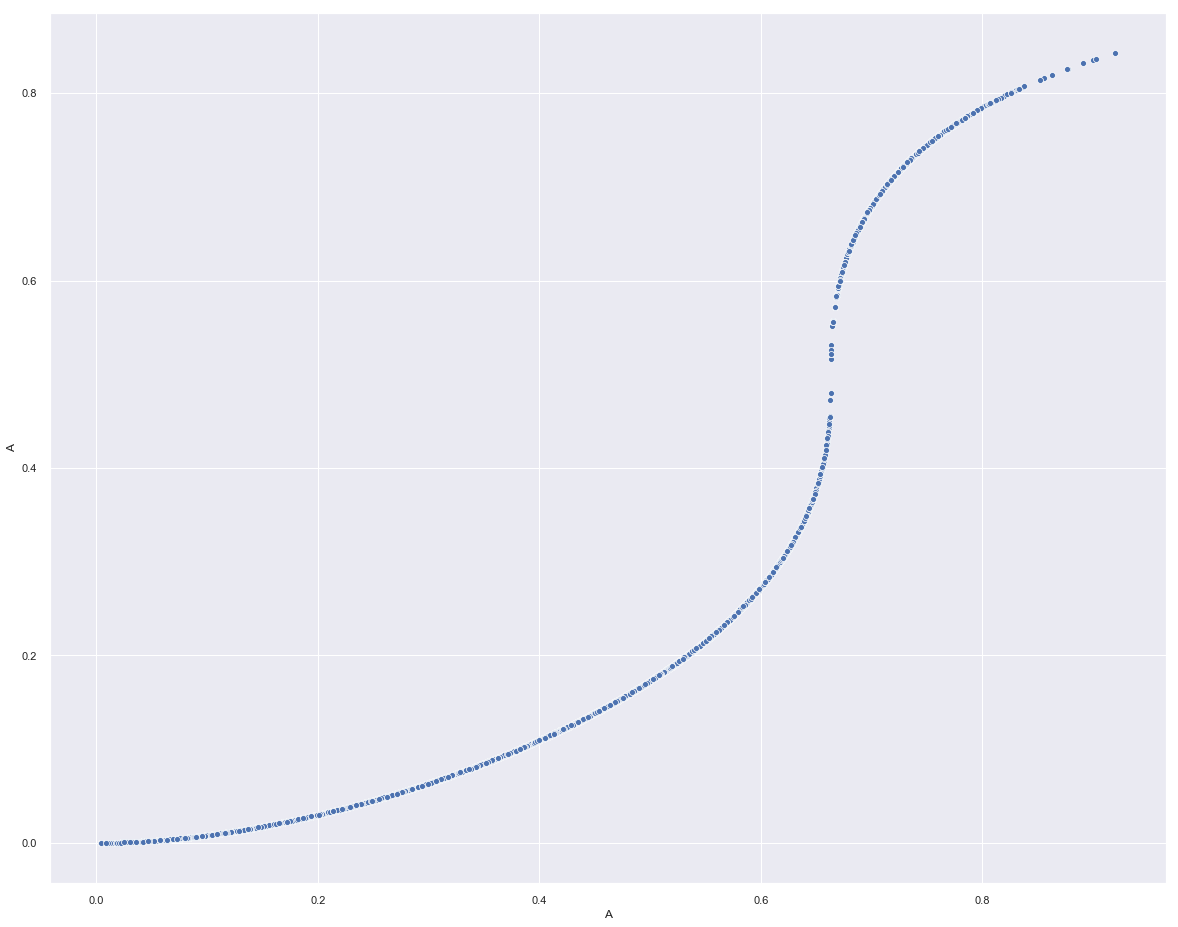

In [160]:
regFec = useData["A"].apply(sigmoCurve, args=(popt[0], popt[1],1))
fig, ax = plt.subplots(figsize=(20,16))
plot1 = sns.scatterplot(x=useData["A"], y=regFec, ax=ax)

[0.31312501 0.58662393 0.02921964]


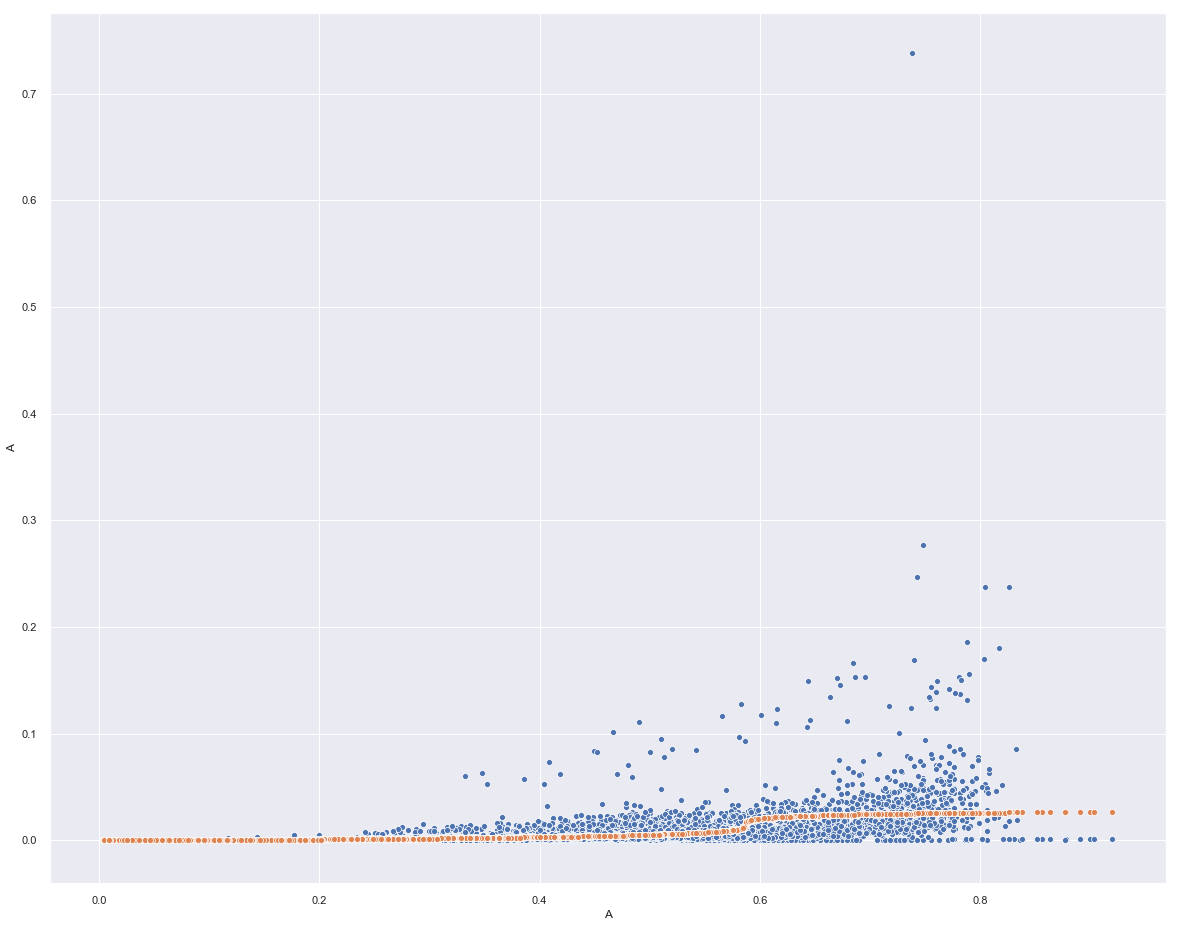

In [166]:
predFec = ((useData["APref"]/useData["APref"].max())*useData["A"])
popt, pcov = curve_fit(sigmoCurve, xdata=useData["A"], ydata=predFec, p0=[0.5, 0.5, predFec.median()], bounds=([0,0,0], [1,1,np.inf]))
print(popt)
regFec = useData["A"].apply(sigmoCurve, args=tuple(popt))
regFec.describe()


fig, ax = plt.subplots(figsize=(20,16))
plot1 = sns.scatterplot(x=useData["A"], y=predFec, ax=ax)
plot2 = sns.scatterplot(x=useData["A"], y=regFec, ax=ax)

In [47]:
useData = data[(data["I"]!=0) & (data["I"] !=1)]

popt, pcov = curve_fit(sigmoCurve, xdata=useData["I"], ydata=useData["IPref"], p0=[0.5, 1, useData["IPref"].median()], bounds=([0,0,0], [1,2,np.inf]))
print(popt)
predFec = useData["I"].apply(sigmoCurve, args=tuple(popt))
predFec.describe()

[6.02273946e-01 8.20345267e-01 7.17913049e+03]


count    49498.000000
mean      1581.439636
std       1004.690515
min          0.792920
25%        975.332663
50%       1257.162581
75%       1789.599295
max       4936.628715
Name: I, dtype: float64

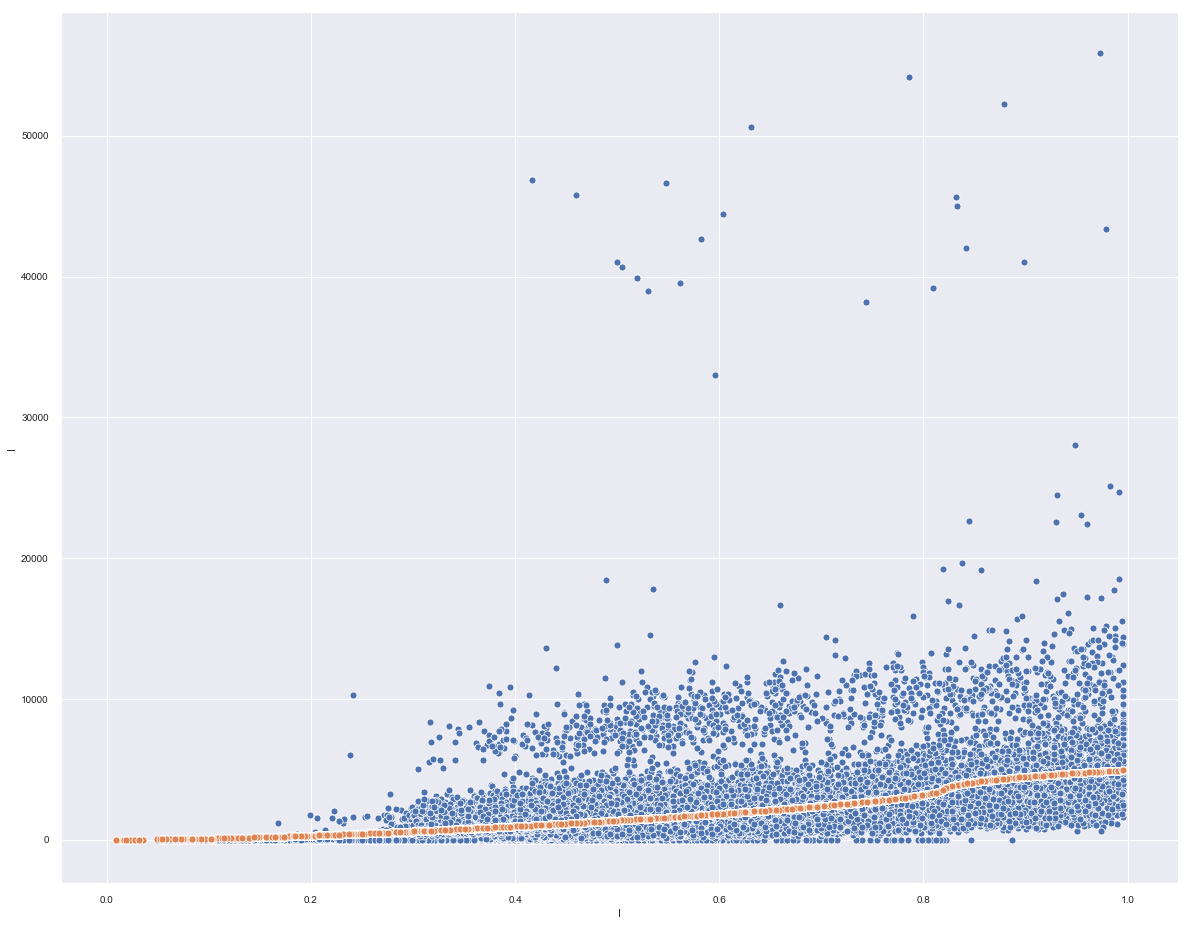

In [48]:
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1=sns.scatterplot(x="I", y="IPref", data=useData, ax=axarr)
plot2 = sns.scatterplot(x=useData["I"], y=predFec, ax=axarr)

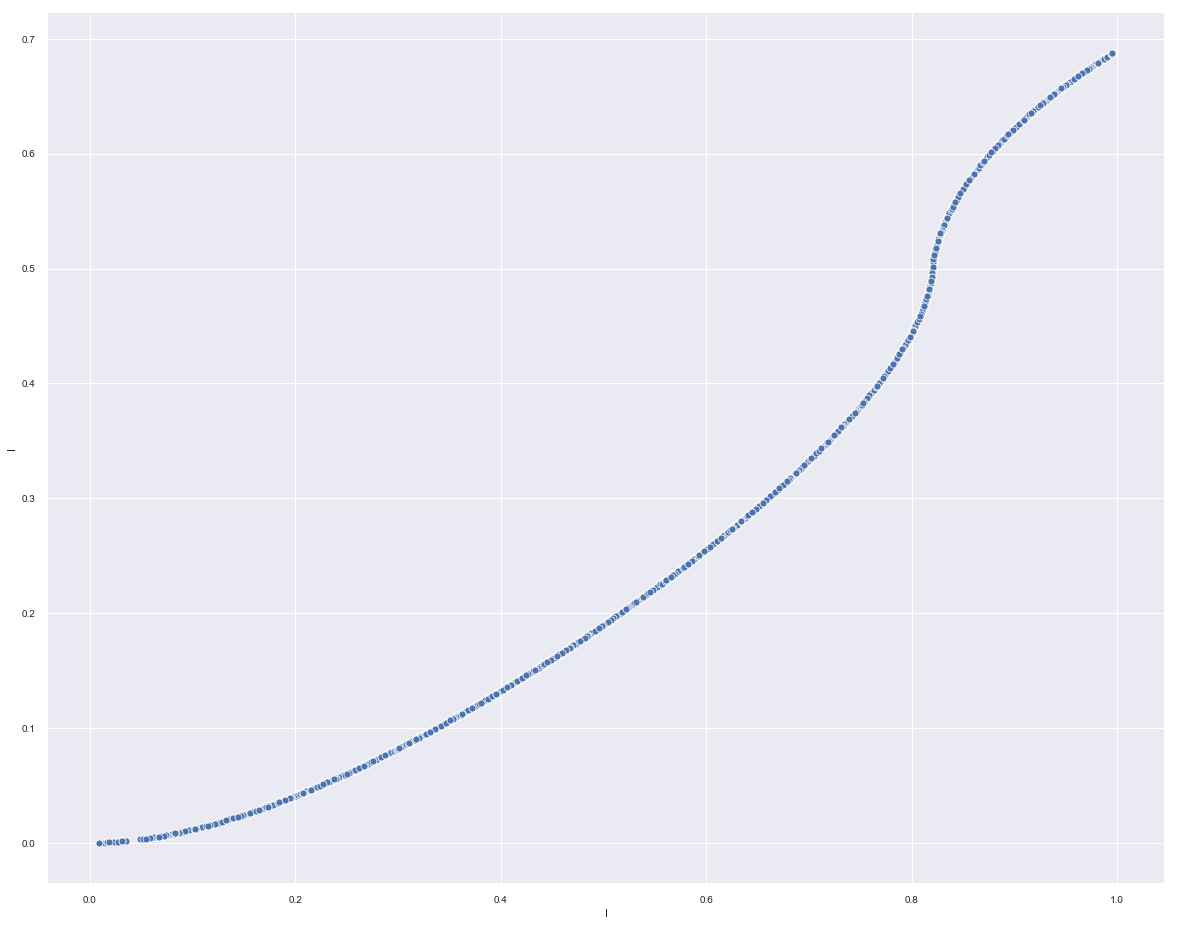

In [49]:
regFec = useData["I"].apply(sigmoCurve, args=(popt[0], popt[1],1))
fig, ax = plt.subplots(figsize=(20,16))
plot1 = sns.scatterplot(x=useData["I"], y=regFec, ax=ax)

In [75]:
useData = data[(data["O"]!=0) & (data["O"]!=1)]


popt, pcov = curve_fit(sigmoCurve, xdata=useData["O"], ydata=useData["OPref"], p0=[0.5, 1, useData["OPref"].median()], bounds=([0,0,0], [1,2,np.inf]))
print(popt)
predFec = useData["O"].apply(sigmoCurve, args=tuple(popt))
predFec.describe()

[5.88709817e-01 9.00111809e-01 8.66307828e+03]


count    49596.000000
mean      1417.395446
std       1102.771979
min          0.159204
25%        786.899684
50%       1129.088126
75%       1679.024062
max       5492.212705
Name: O, dtype: float64

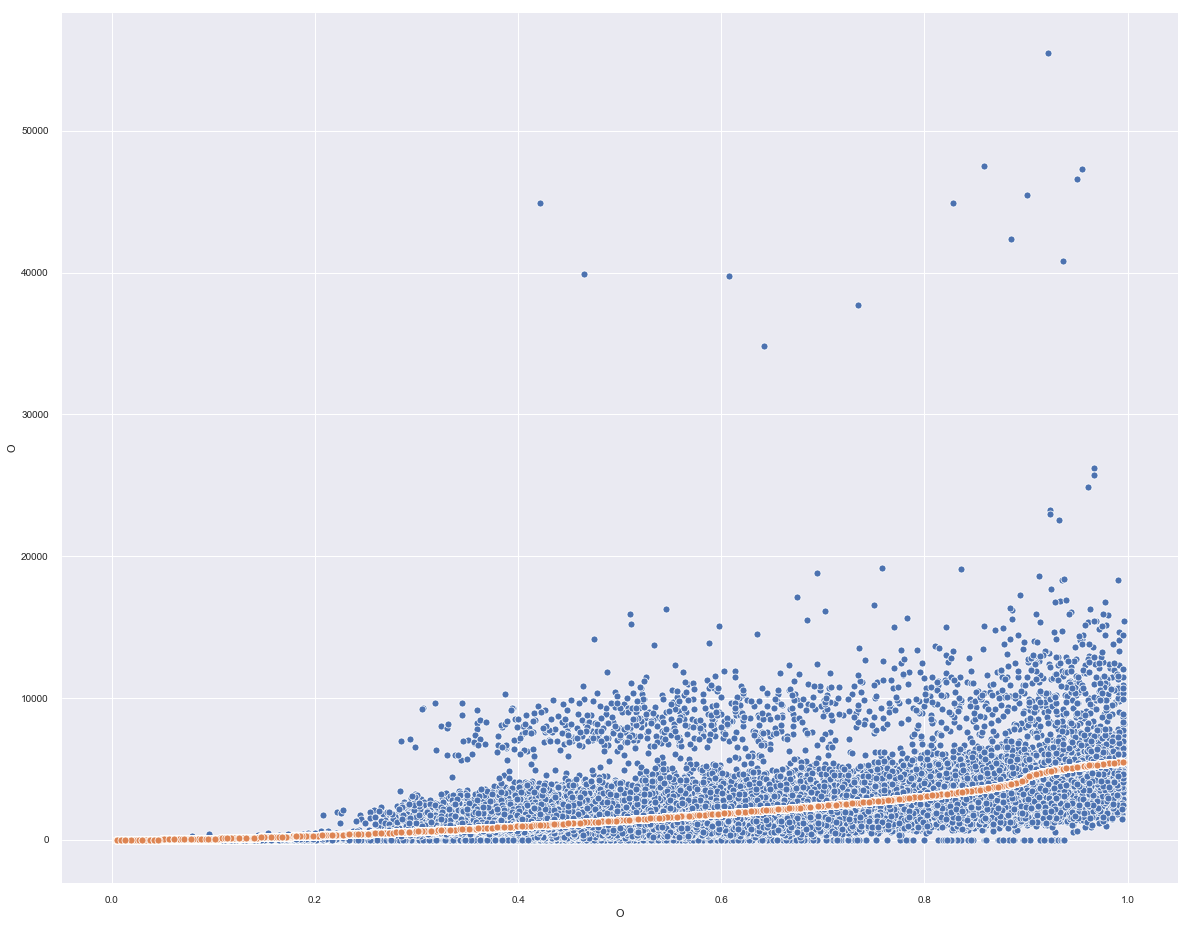

In [76]:
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1=sns.scatterplot(x="O", y="OPref", data=useData, ax=axarr)
plot2 = sns.scatterplot(x=useData["O"], y=predFec, ax=axarr)

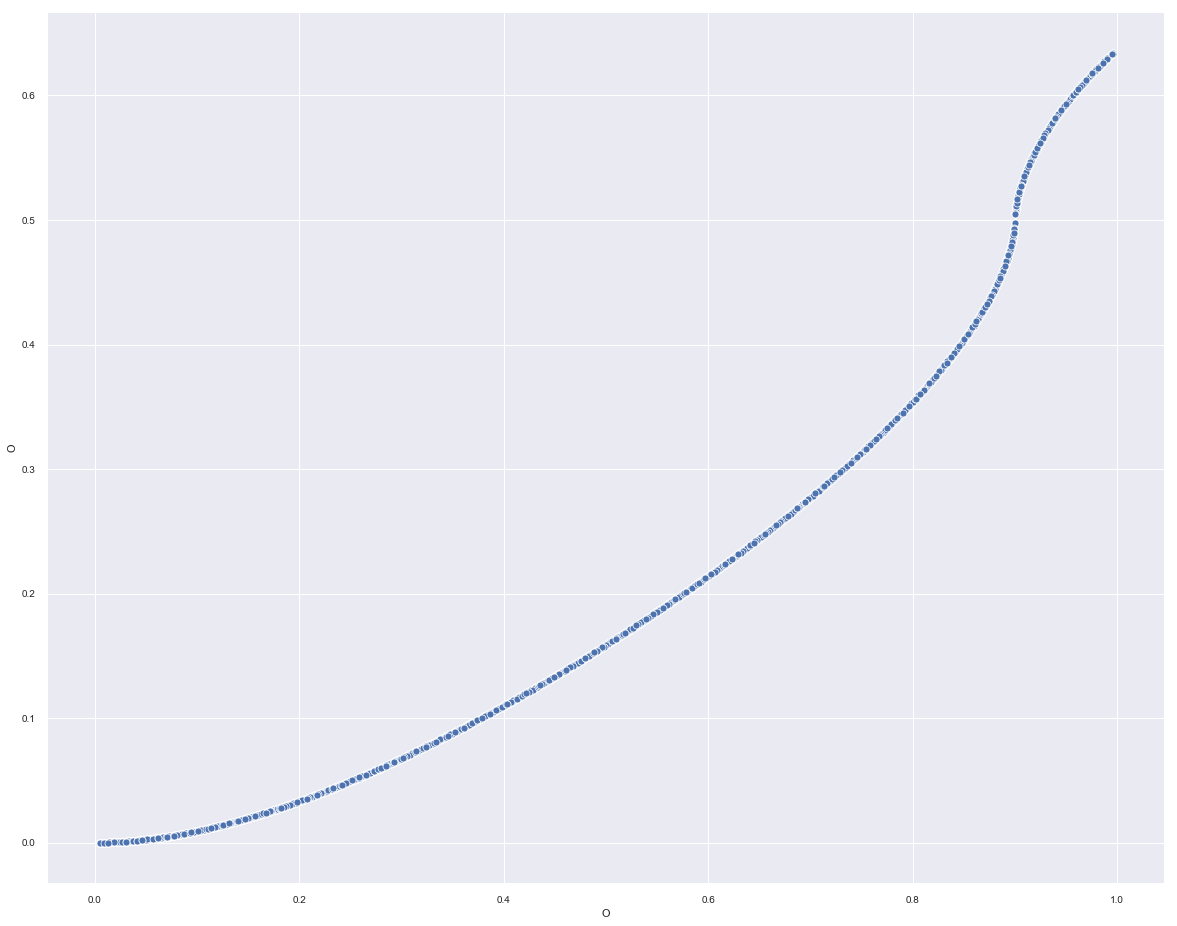

In [77]:
regFec = useData["O"].apply(sigmoCurve, args=(popt[0], popt[1],1))
fig, ax = plt.subplots(figsize=(20,16))
plot1 = sns.scatterplot(x=useData["O"], y=regFec, ax=ax)

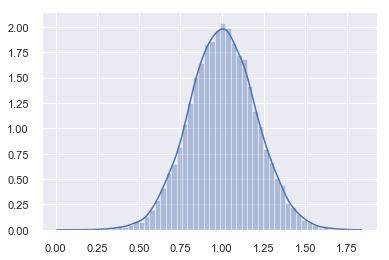

In [172]:
test = np.random.normal(1,0.2, 10000)
test = pd.DataFrame(test)
fig, ax = plt.subplots()
plot1 = sns.distplot(test, ax=ax)

                            OLS Regression Results                            
Dep. Variable:                   AFec   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     72.19
Date:                Fri, 18 Oct 2019   Prob (F-statistic):           1.09e-15
Time:                        00:53:34   Log-Likelihood:                -1421.1
No. Observations:                 288   AIC:                             2846.
Df Residuals:                     286   BIC:                             2853.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    303.7804     10.511     28.902      0.0

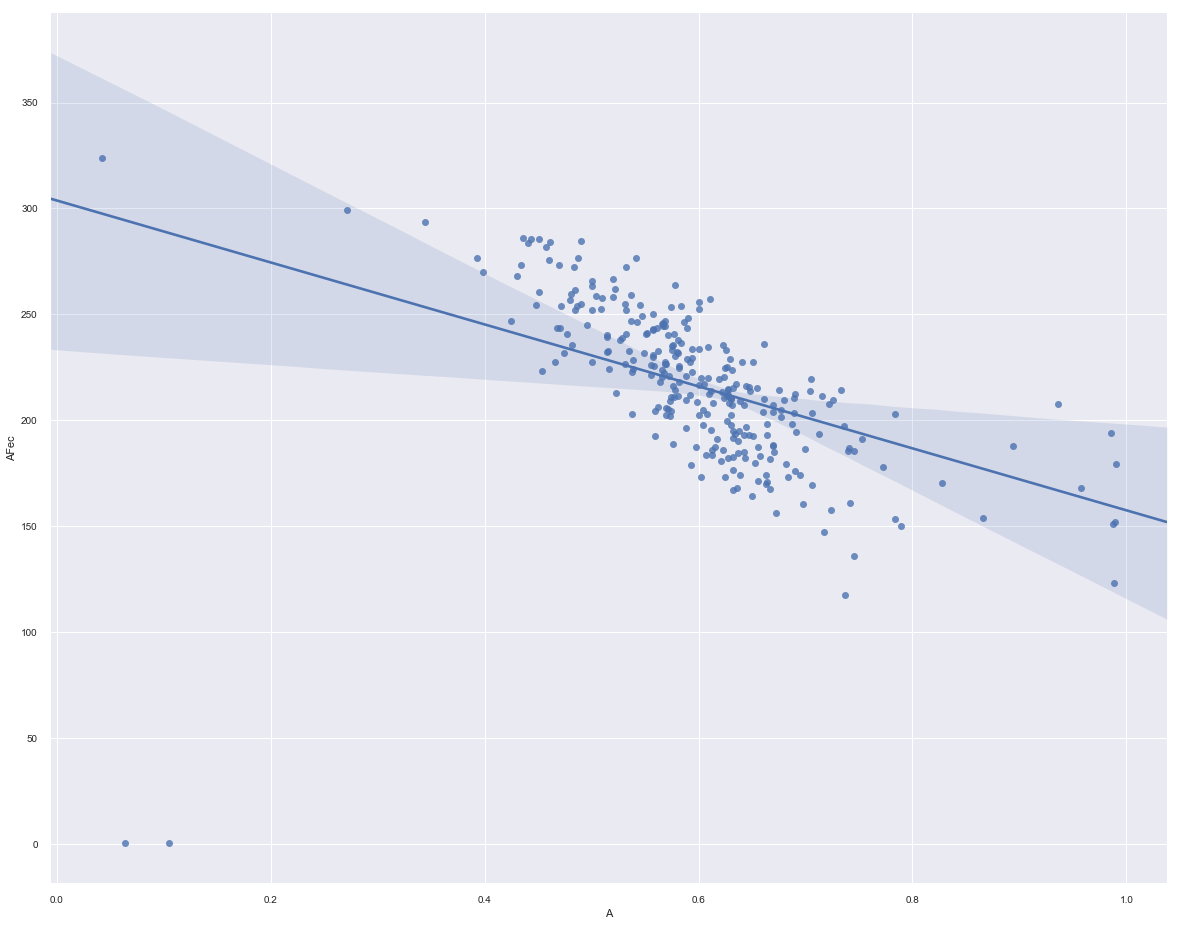

In [7]:
est = smf.ols(formula="AFec~A", data=useData).fit()
print(est.summary())
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="A", y="AFec", data=useData, ax=axarr)

                            OLS Regression Results                            
Dep. Variable:                   AFec   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                 1.724e+04
Date:                Thu, 17 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:13:15   Log-Likelihood:            -1.5917e+05
No. Observations:               31949   AIC:                         3.184e+05
Df Residuals:                   31947   BIC:                         3.184e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    322.5851      0.789    408.858      0.0

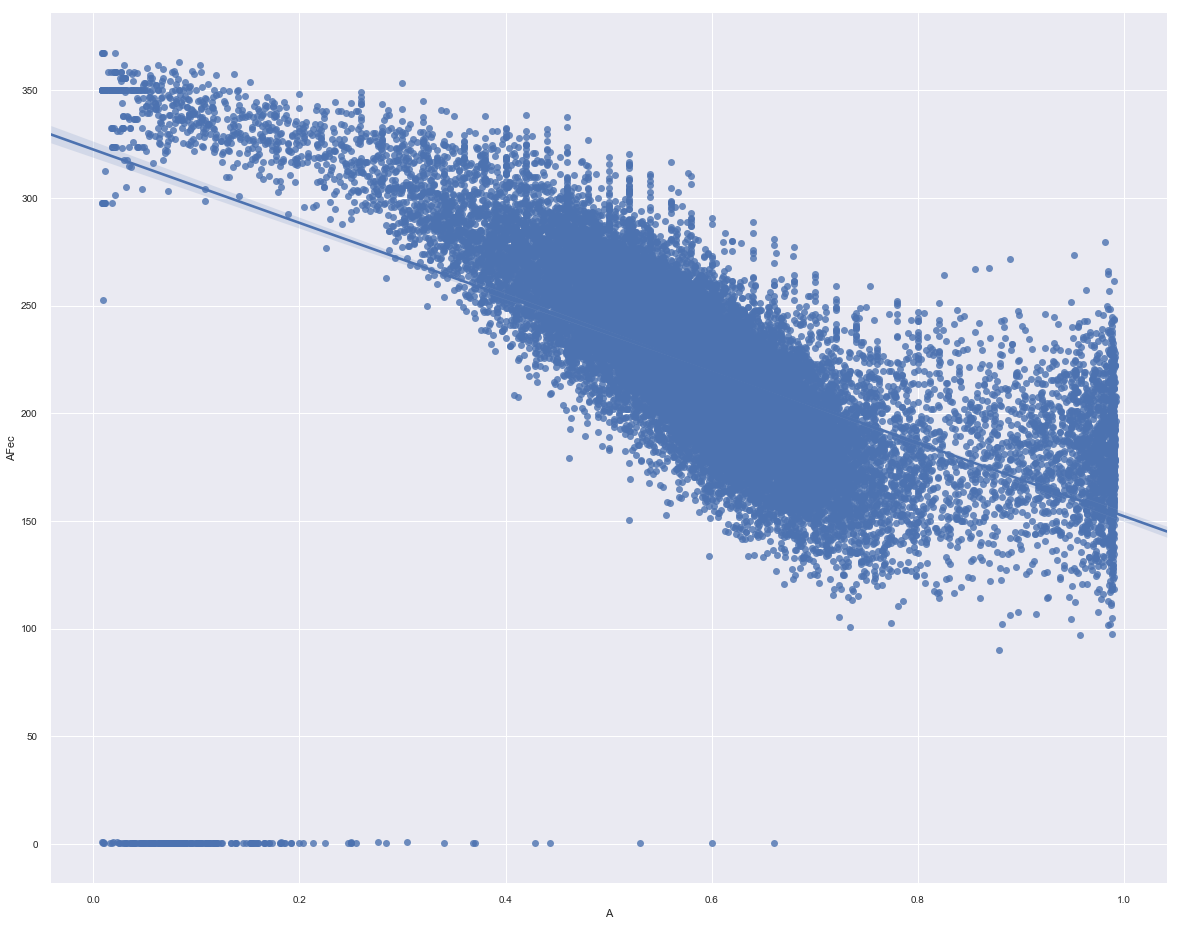

In [37]:
est = smf.ols(formula="AFec~A", data=data[(data["A"]!=0) & (data["A"]!=1) & (data["AFec"]!=0)]).fit()
print(est.summary())
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="A", y="AFec", data=data[(data["A"]!=0) & (data["A"]!=1) & (data["AFec"]!=0)], ax=axarr)

                            OLS Regression Results                            
Dep. Variable:                   IFec   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     584.9
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           2.62e-75
Time:                        16:10:23   Log-Likelihood:                -1637.4
No. Observations:                 335   AIC:                             3279.
Df Residuals:                     333   BIC:                             3286.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    393.6763      6.631     59.370      0.0

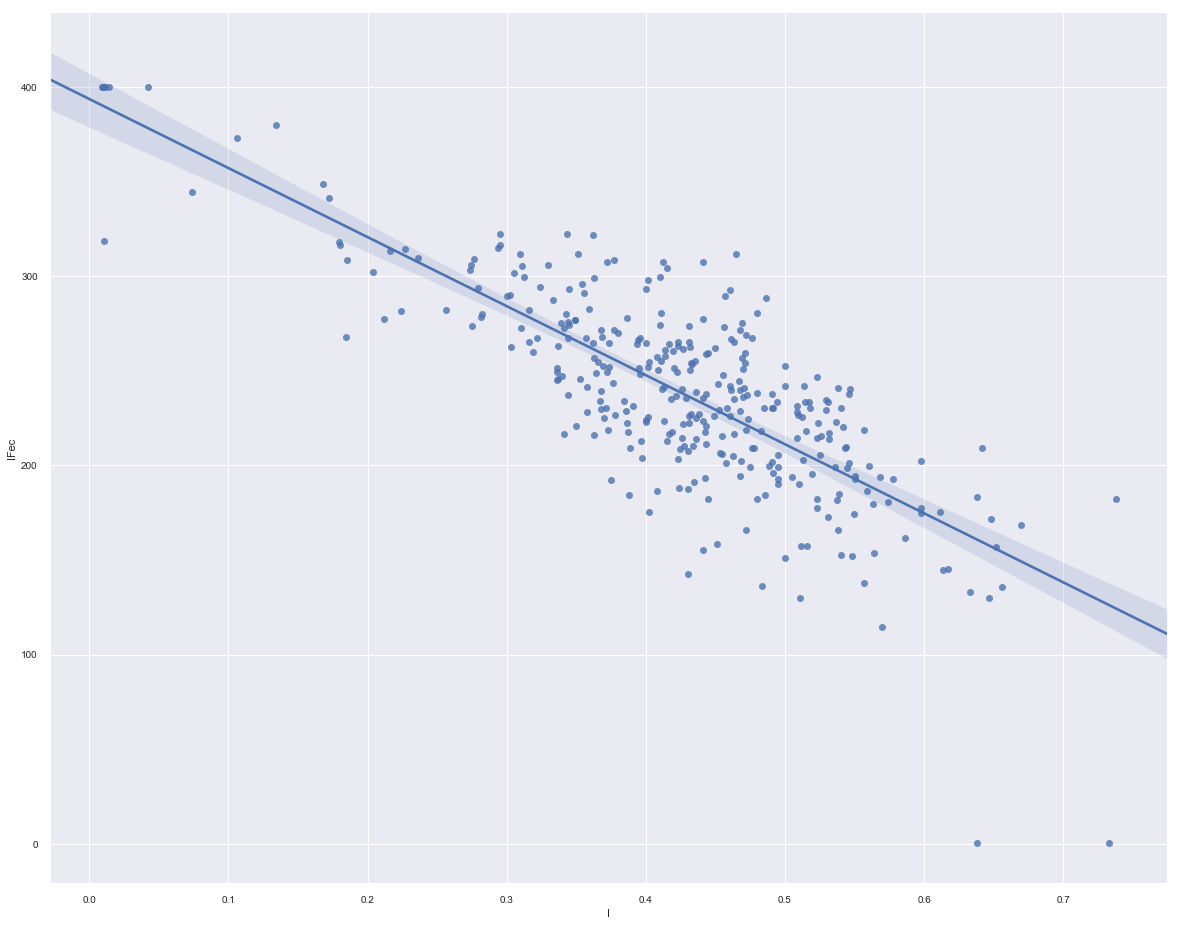

In [35]:
est = smf.ols(formula="IFec~I", data=finals[(finals["I"]!=0) & (finals["I"]!=1) & (finals["IFec"]!=0)]).fit()
print(est.summary())
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="I", y="IFec", data=finals[(finals["I"]!=0) & (finals["I"]!=1) & (finals["IFec"]!=0)], ax=axarr)

                            OLS Regression Results                            
Dep. Variable:                   OFec   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     371.3
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           2.36e-54
Time:                        16:11:36   Log-Likelihood:                -1533.1
No. Observations:                 301   AIC:                             3070.
Df Residuals:                     299   BIC:                             3078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    364.5426      6.968     52.320      0.0

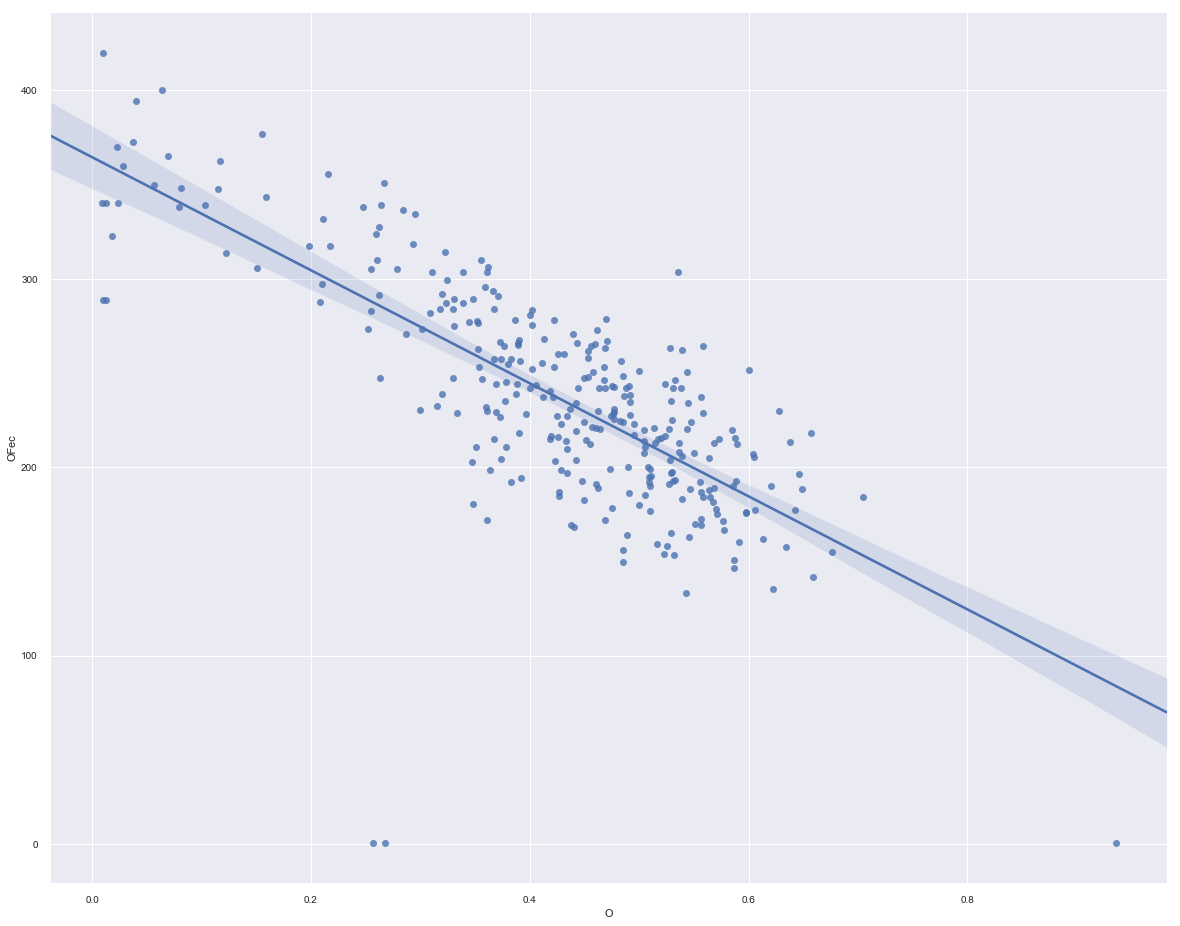

In [36]:
est = smf.ols(formula="OFec~O", data=finals[(finals["O"]!=0) & (finals["O"]!=1) & (finals["OFec"]!=0)]).fit()
print(est.summary())
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="O", y="OFec", data=finals[(finals["O"]!=0) & (finals["O"]!=1) & (finals["OFec"]!=0)], ax=axarr)

## Multiple Linear Regression


### Controls

In [3]:
est = smf.ols(formula="A~I*O", data=finals).fit()
print(est.summary())


                            OLS Regression Results                            
Dep. Variable:                      A   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.844e+04
Date:                Tue, 15 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:30:54   Log-Likelihood:                 1798.2
No. Observations:                 905   AIC:                            -3588.
Df Residuals:                     901   BIC:                            -3569.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9961      0.002    478.164      0.0

In [27]:
est = smf.ols(formula="I~A*O", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      I   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     25.81
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           2.53e-15
Time:                        09:56:44   Log-Likelihood:                -10.101
No. Observations:                 418   AIC:                             28.20
Df Residuals:                     414   BIC:                             44.34
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2595      0.022     12.043      0.0

In [28]:
est = smf.ols(formula="O~I*A", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      O   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     26.96
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           6.05e-16
Time:                        09:56:44   Log-Likelihood:                 26.682
No. Observations:                 418   AIC:                            -45.36
Df Residuals:                     414   BIC:                            -29.22
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2176      0.020     10.730      0.0

In [29]:
est = smf.ols(formula="Total~A:I:O", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     5.311
Date:                Tue, 10 Sep 2019   Prob (F-statistic):             0.0217
Time:                        09:56:44   Log-Likelihood:                -2731.1
No. Observations:                 418   AIC:                             5466.
Df Residuals:                     416   BIC:                             5474.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    212.0371      8.379     25.305      0.0

### Preference per Morph

In [4]:
est = smf.ols(formula="preAPref~A*maleRatio", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:               preAPref   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.640e+04
Date:                Tue, 15 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:32:11   Log-Likelihood:                 1523.0
No. Observations:                 904   AIC:                            -3038.
Df Residuals:                     900   BIC:                            -3019.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0424      0.030      1.425      

In [31]:
est = smf.ols(formula="APref~A*maleRatio", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  APref   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     247.9
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           1.46e-82
Time:                        09:56:44   Log-Likelihood:                 706.54
No. Observations:                 319   AIC:                            -1405.
Df Residuals:                     315   BIC:                            -1390.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0268      0.021     -1.300      

In [32]:
est = smf.ols(formula="preIPref~I*maleRatio", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:               preIPref   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -105.0
Date:                Tue, 10 Sep 2019   Prob (F-statistic):               1.00
Time:                        09:56:44   Log-Likelihood:                 10681.
No. Observations:                 319   AIC:                        -2.135e+04
Df Residuals:                     315   BIC:                        -2.134e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3333   9.11e-16   3.66e+14      

In [33]:
est = smf.ols(formula="IPref~I*maleRatio", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  IPref   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     166.2
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           1.41e-64
Time:                        09:56:44   Log-Likelihood:                 207.42
No. Observations:                 319   AIC:                            -406.8
Df Residuals:                     315   BIC:                            -391.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0374      0.165     -0.226      

In [34]:
est = smf.ols(formula="preOPref~O*maleRatio", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:               preOPref   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -105.0
Date:                Tue, 10 Sep 2019   Prob (F-statistic):               1.00
Time:                        09:56:44   Log-Likelihood:                 10722.
No. Observations:                 319   AIC:                        -2.144e+04
Df Residuals:                     315   BIC:                        -2.142e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3333   9.96e-16   3.35e+14      

In [35]:
est = smf.ols(formula="OPref~O*maleRatio", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  OPref   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     166.5
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           1.14e-64
Time:                        09:56:44   Log-Likelihood:                 207.57
No. Observations:                 319   AIC:                            -407.1
Df Residuals:                     315   BIC:                            -392.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0420      0.206     -0.204      

In [36]:
est = smf.ols(formula="FemF~A*Total", data=finals).fit()
print(est.summary())

c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\regression\linear_model.py:1594: RuntimeWarning: invalid value encountered in double_scalars
  return self.mse_model/self.mse_resid
c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invali

                            OLS Regression Results                            
Dep. Variable:                   FemF   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 10 Sep 2019   Prob (F-statistic):                nan
Time:                        09:56:44   Log-Likelihood:                    inf
No. Observations:                 418   AIC:                              -inf
Df Residuals:                     414   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept           0          0        nan        n

c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\stats\stattools.py:47: RuntimeWarning: invalid value encountered in double_scalars
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)
c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


In [37]:
est = smf.ols(formula="FemF~(A:I)+Total", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   FemF   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 10 Sep 2019   Prob (F-statistic):                nan
Time:                        09:56:44   Log-Likelihood:                    inf
No. Observations:                 418   AIC:                              -inf
Df Residuals:                     415   BIC:                              -inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept           0          0        nan        n

In [38]:
est = smf.ols(formula="MalF~(A:I:O)+Total", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MalF   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 10 Sep 2019   Prob (F-statistic):                nan
Time:                        09:56:44   Log-Likelihood:                    inf
No. Observations:                 418   AIC:                              -inf
Df Residuals:                     415   BIC:                              -inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept           0          0        nan        n

# Plots

## Correlation

ValueError: cannot convert float NaN to integer

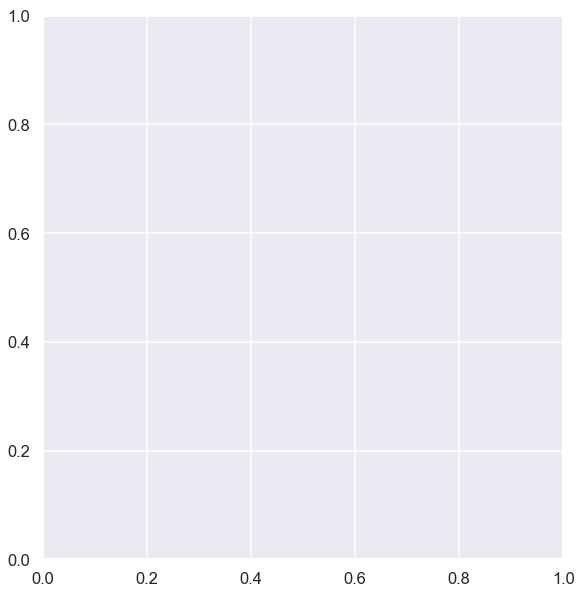

In [5]:
sns.set_context("talk")
sns.set_style("darkgrid")
corr = data.corr()
plt.figure(figsize=(10,10))
corrplot(data.corr())
plt.subplots_adjust(left=0.2, bottom=0.2)

## Correlation Per Population

ValueError: cannot convert float NaN to integer

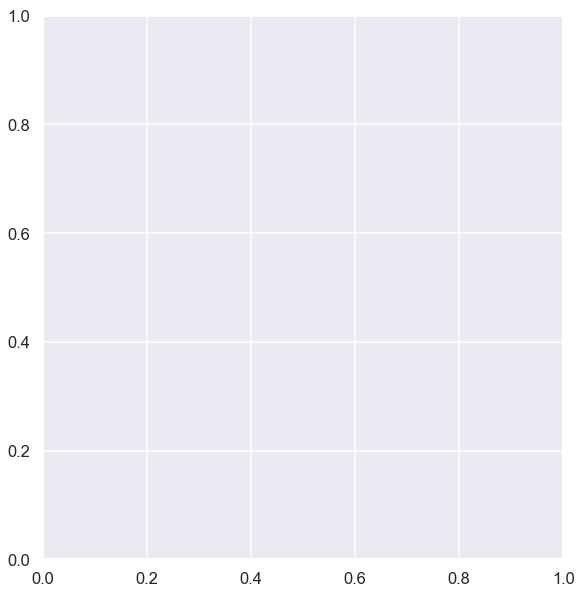

In [6]:
for pop, popData in pops:
    sns.set_style("darkgrid")
    plt.figure(figsize=(10,10))
    corrplot(popData.corr())
    plt.subplots_adjust(left=0.2, bottom=0.2)
    

## Preference vs. Frequency

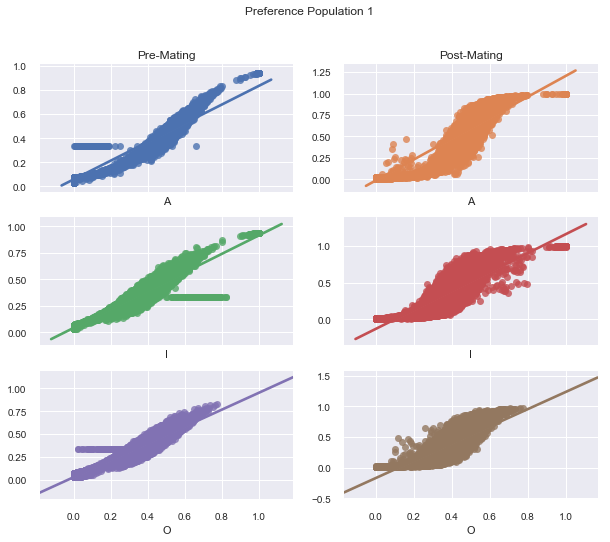

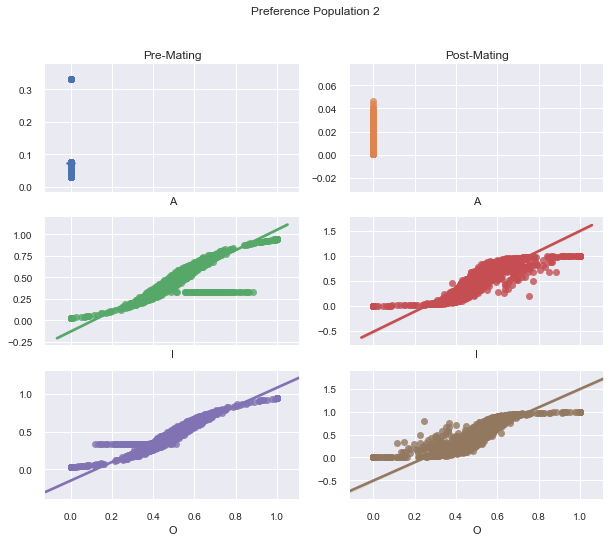

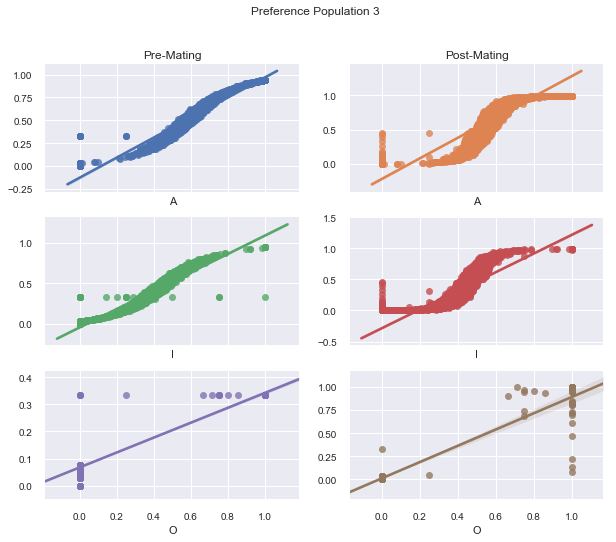

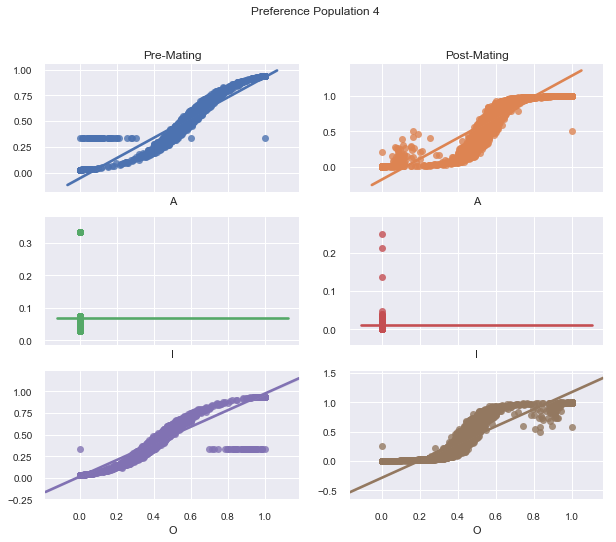

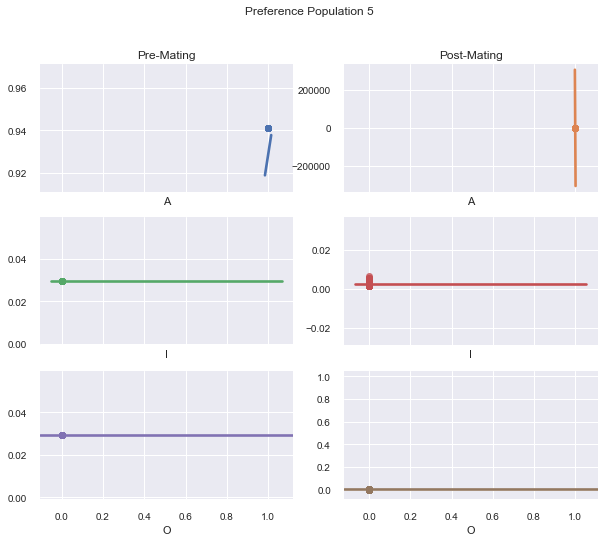

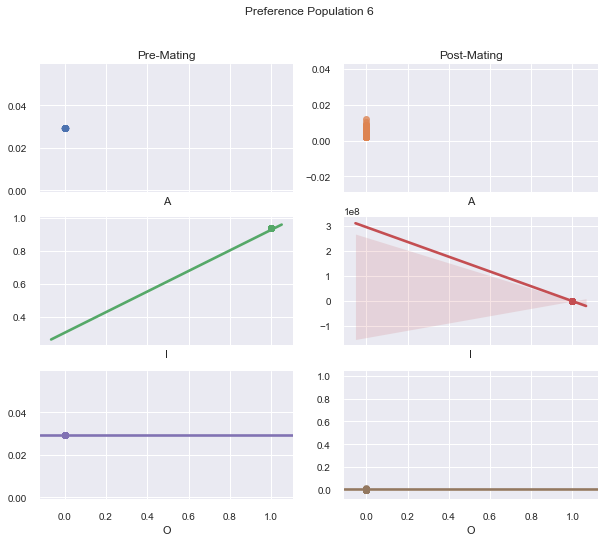

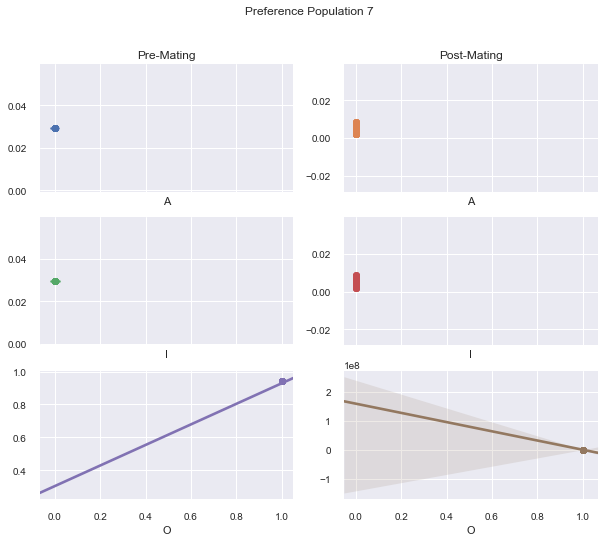

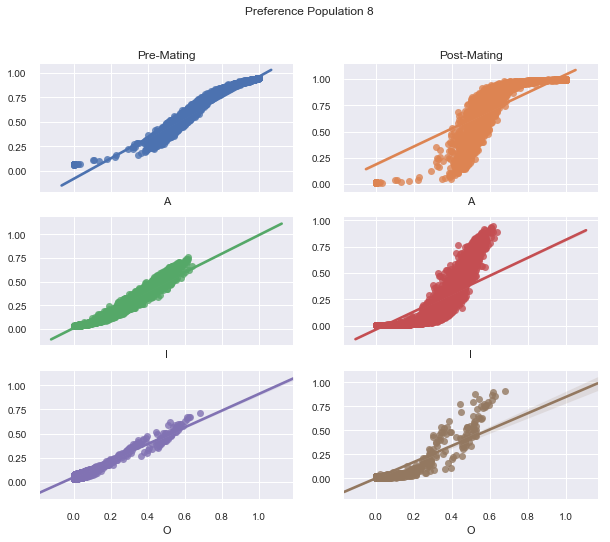

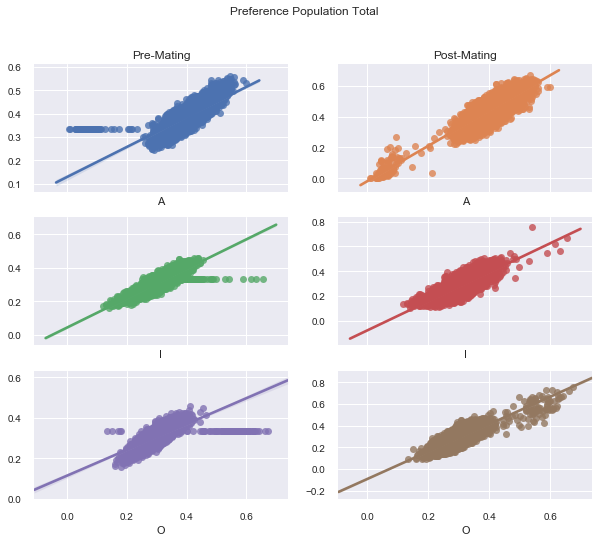

In [6]:
for pop, popData in pops:
    fig, axarr = plt.subplots(3,2, sharex ='col', sharey=False, figsize=(10,8))
    fig.suptitle("Preference Population "+pop)
    plot1 = sns.regplot(x="A", y="preAPref", data=popData, ax=axarr[0,0])
    plot1.set(ylabel="")
    plot1.set_title("Pre-Mating")
    plot2 = sns.regplot(x="A", y="APref", data=popData, ax=axarr[0,1])
    plot2.set(ylabel="")
    plot2.set_title("Post-Mating")
    plot3 = sns.regplot(x="I", y="preIPref", data=popData, ax=axarr[1,0])
    plot3.set(ylabel="")
    plot4 = sns.regplot(x="I", y="IPref", data=popData, ax=axarr[1,1])
    plot4.set(ylabel="")
    plot5 = sns.regplot(x="O", y="preOPref", data=popData, ax=axarr[2,0])
    plot5.set(ylabel="")
    plot6 = sns.regplot(x="O", y="OPref", data=popData, ax=axarr[2,1])
    plot6.set(ylabel="")
    sns.despine()

## Fertility Per Population

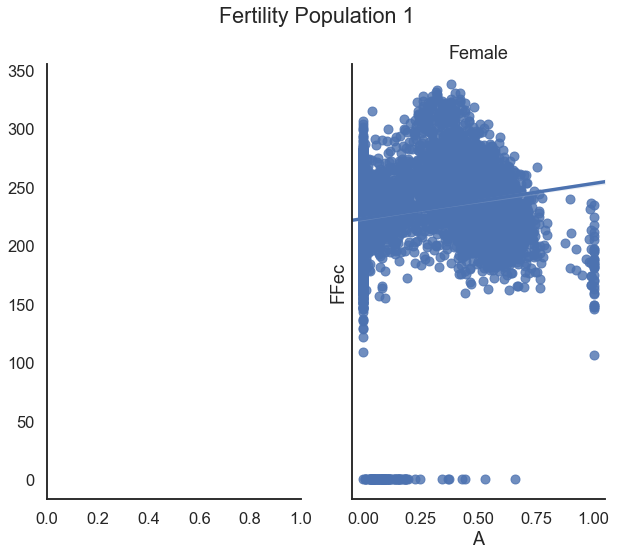

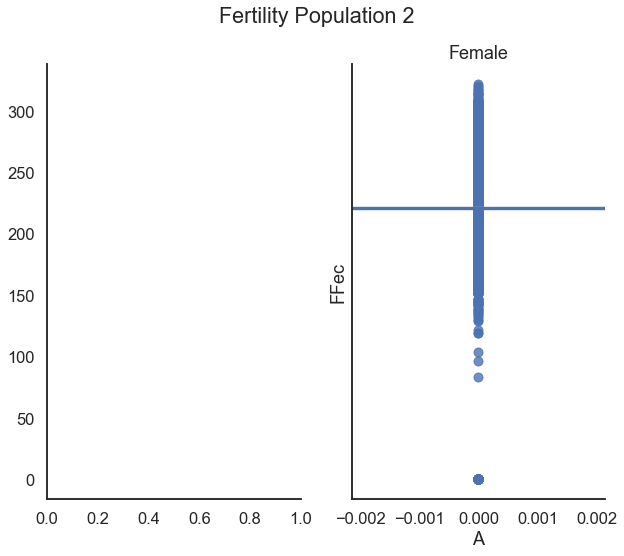

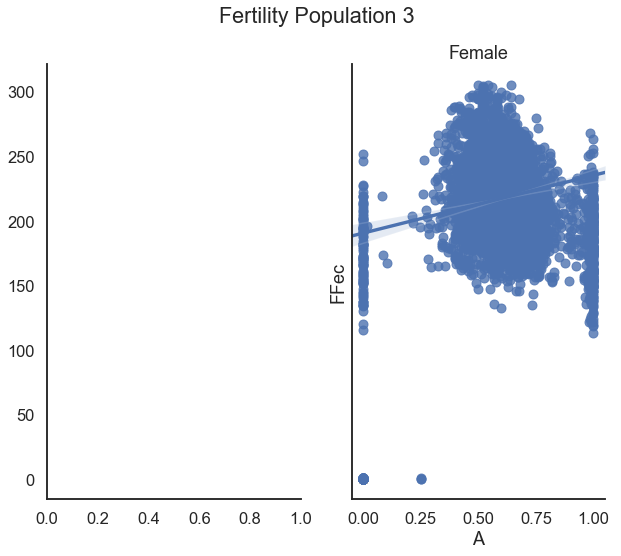

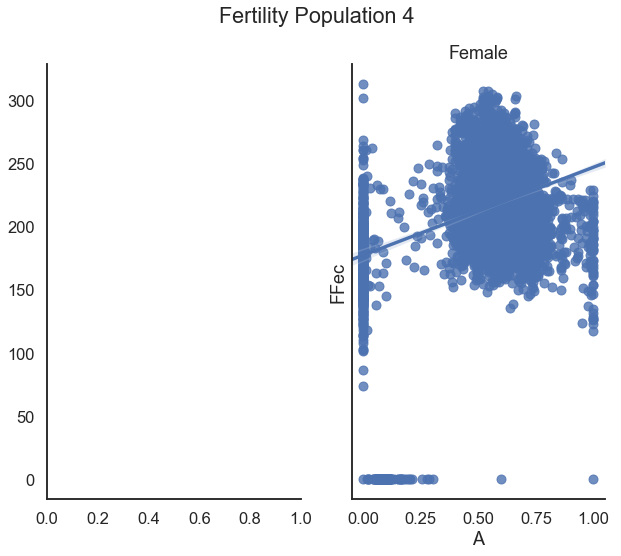

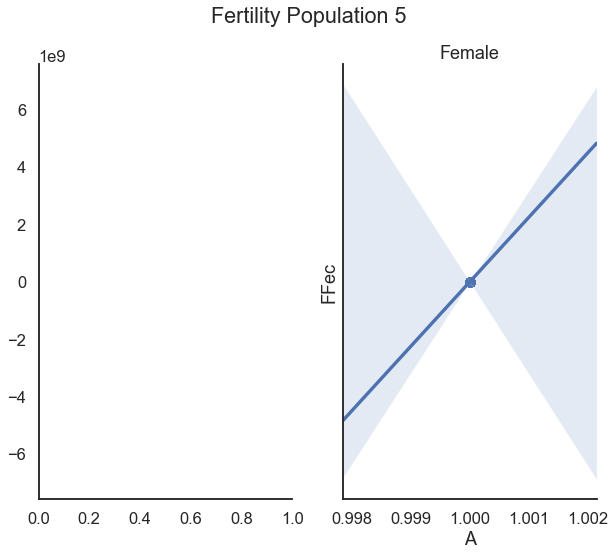

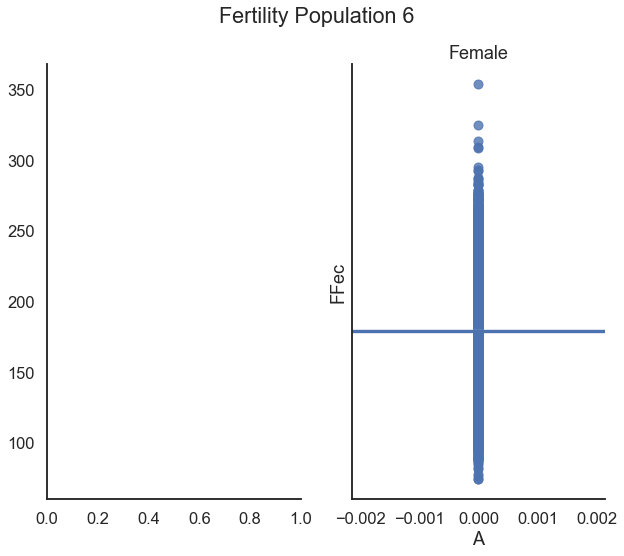

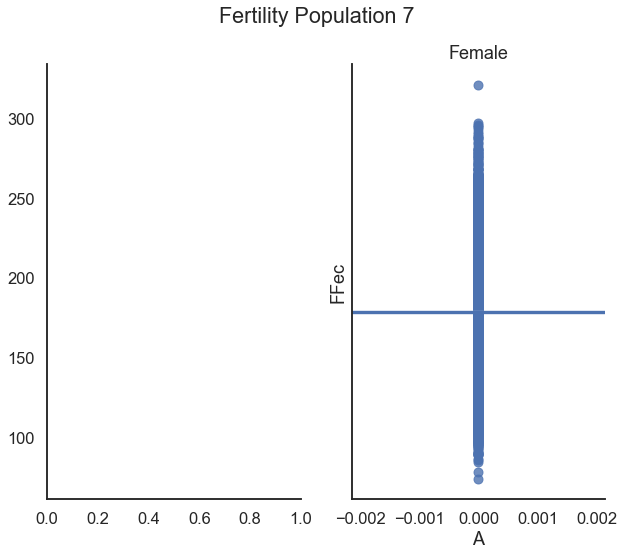

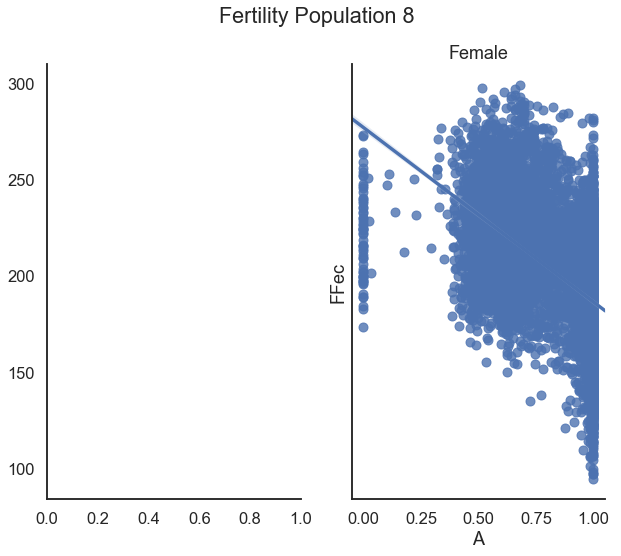

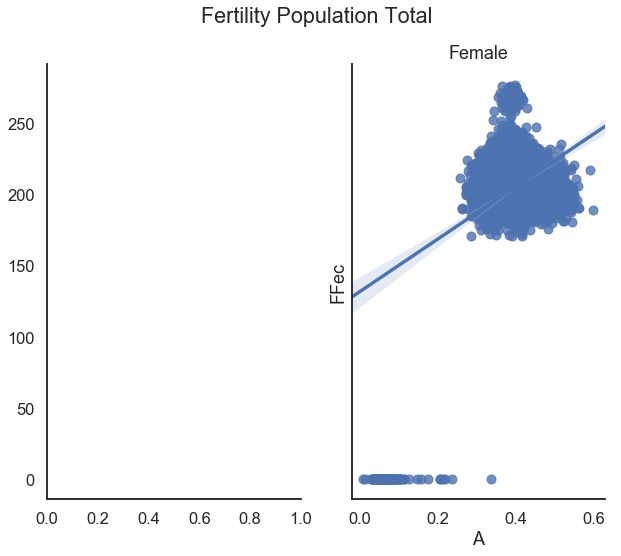

In [9]:
for pop, popData in pops:
    sns.set_style("white")
    fig, axarr = plt.subplots(1,2, sharey=True, figsize=(10,8))
    #plot1 = sns.regplot(x="A", y="MalF", data=popData,ax=axarr[0])
    #plot1.set_title("Male")
    plot2 = sns.regplot(x="A", y="FFec", data=popData, ax=axarr[1])
    plot2.set_title("Female")
    sns.despine()
    fig.suptitle("Fertility Population "+pop)

## Male-male Interactions

In [ ]:
for pop, popData in pops:
    fig = plt.figure(figsize=(10,8))
    plot = sns.regplot(x="A", y="misIdent", data=popData)
    fig.suptitle("Population "+pop)
    sns.despine()

## Sex Distribution

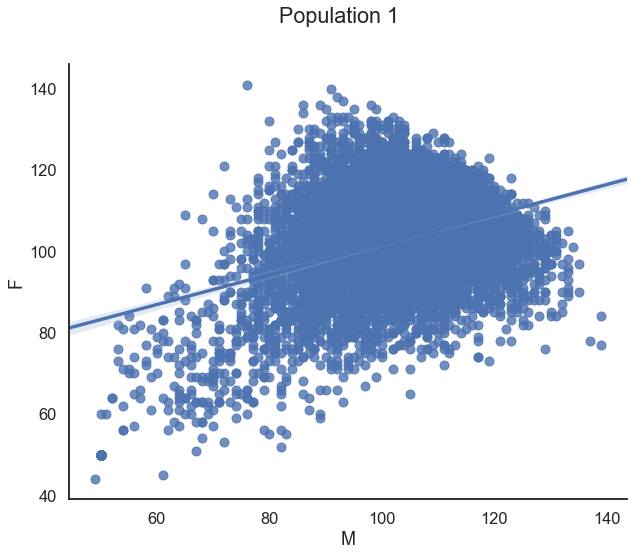

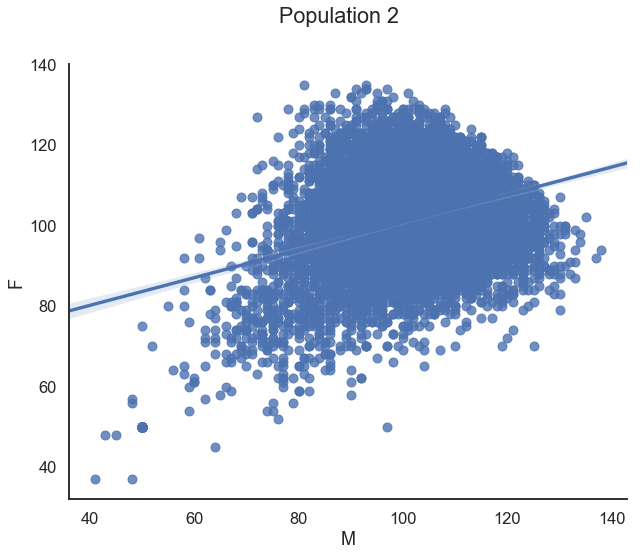

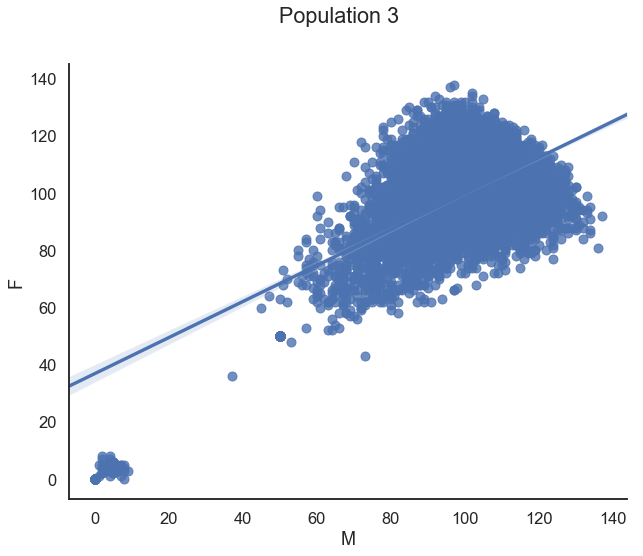

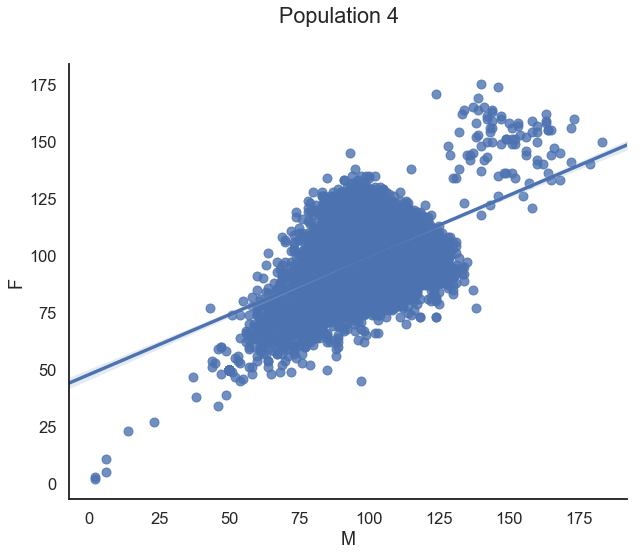

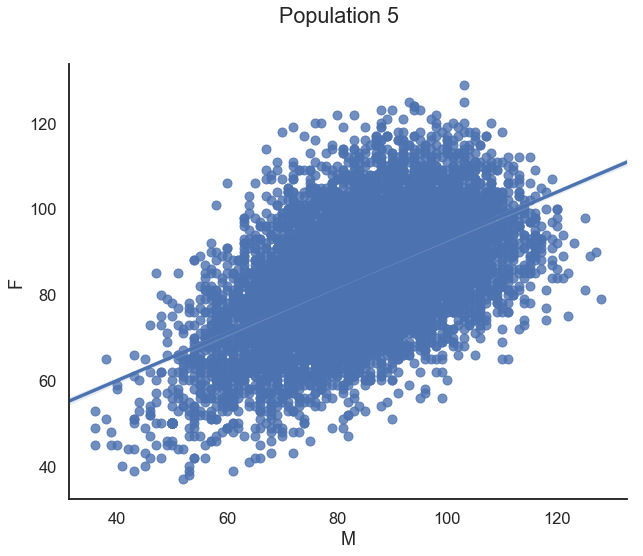

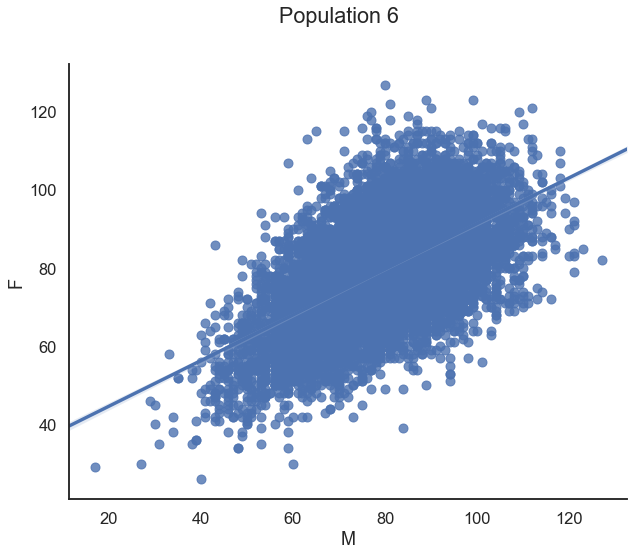

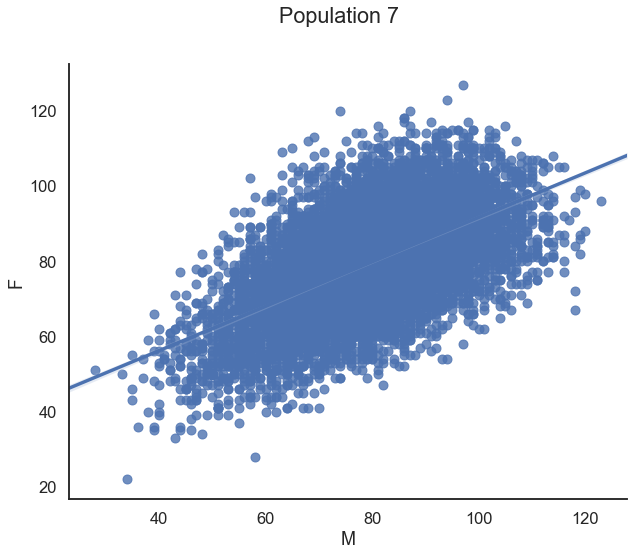

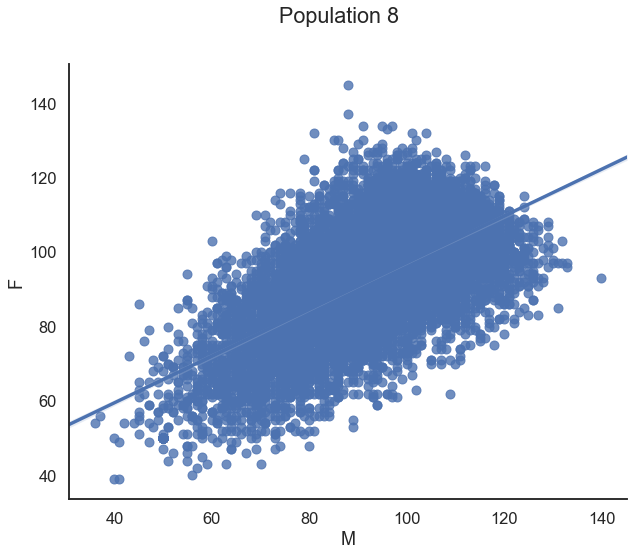

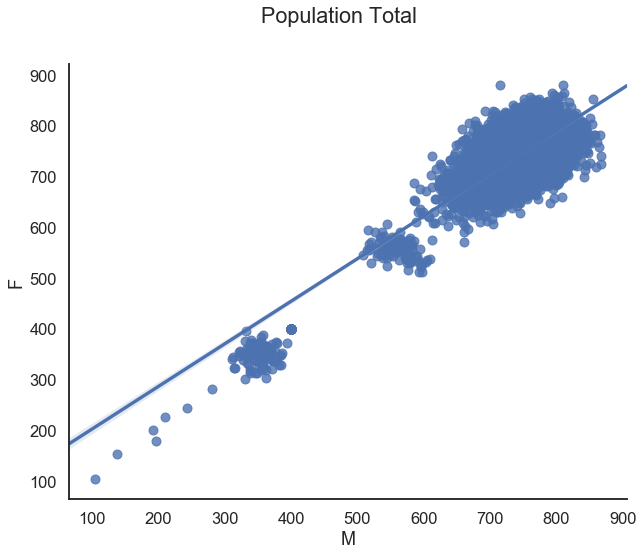

In [10]:
for pop, popData in pops:
    fig = plt.figure(figsize=(10,8))
    plot = sns.regplot(x="M", y="F", data=popData)
    fig.suptitle("Population "+pop)

    sns.despine()

## Migration

In [ ]:
for pop, popData in pops:
    fig = plt.figure(figsize=(10,8))
    plot = sns.regplot(x="Total", y="migrations", data=popData)
    fig.suptitle("Population "+pop)
    sns.despine()

## Multiple Regression

In [11]:
from mpl_toolkits.mplot3d import Axes3D
X = data[["A", "I"]]
print(X.describe())
y = data["O"]
print(y.describe())
X = sm.add_constant(X)
est = sm.OLS(y,X, missing='drop').fit()
print(est.summary())


                  A             I
count  90500.000000  90500.000000
mean       0.398126      0.309385
std        0.368660      0.318740
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.428571      0.304920
75%        0.637931      0.468750
max        1.000000      1.000000
count    90500.000000
mean         0.291981
std          0.327572
min          0.000000
25%          0.000000
50%          0.265036
75%          0.469565
max          1.000000
Name: O, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      O   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 9.535e+06
Date:                Tue, 15 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:37:30   Log-Likelihood:             2.1491e+05
No. Observations:   

c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Text(0.5, 0, 'O')

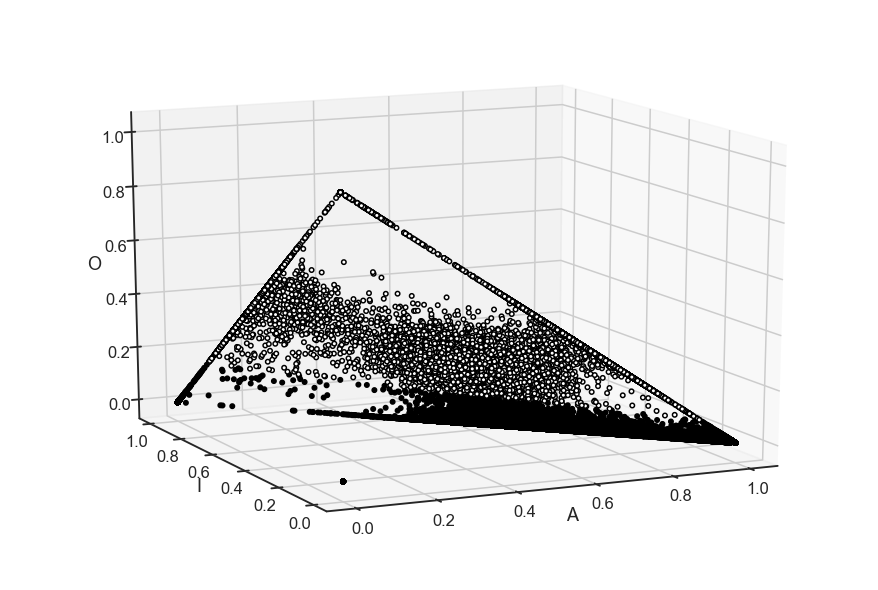

In [12]:
xx1, xx2 = np.meshgrid(np.linspace(X.A.min(), X.A.max(), 100), np.linspace(X.I.min(), X.I.max(), 100))
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

resid = y - est.predict(X)

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

#surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.winter, alpha=0.6, linewidth=0)

ax.scatter(X[resid >= 0].A, X[resid >= 0].I, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].A, X[resid < 0].I, y[resid < 0], color='black', alpha=1.0)

ax.set_xlabel('A')
ax.set_ylabel('I')
ax.set_zlabel('O')


## Ipyvolume testing

In [13]:
import ipyvolume as ipv
ipv.figure(width=500, height=500, controls=True)
ipv.xyzlabel("A","I", "O")
ipv.scatter(data["A"], data["I"], data["O"], size=1, color="red", marker="sphere")
ipv.style.set_style_dark()
ipv.style.background_color("lime")
ipv.show()

## Bokeh Testing

In [14]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, CDSView, GroupFilter
output_notebook()
p = figure(title="Test", x_axis_label="Males", y_axis_label="Females")
source = ColumnDataSource(finals.reset_index())
pop1 = CDSView(source=source, filters=[GroupFilter(column_name="Pop", group="1")])
pop2 = CDSView(source=source, filters=[GroupFilter(column_name="Pop", group="2")])
pop3 = CDSView(source=source, filters=[GroupFilter(column_name="Pop", group="3")])
pop4 = CDSView(source=source, filters=[GroupFilter(column_name="Pop", group="4")])
totalPop = CDSView(source=source, filters=[GroupFilter(column_name="Pop", group="Total")])

colors = {"1": "red", "2": "blue", "3": "green", "4": "yellow", "Total": "black"}
p.circle(x="M", y="F", legend=None, line_color="red", color = "red", source = source, view=pop1)
p.circle(x="M", y="F", legend=None, line_color="blue", color = "blue", source = source, view=pop2)
p.circle(x="M", y="F", legend=None, line_color="green", color = "green", source = source, view=pop3)
p.circle(x="M", y="F", legend=None, line_color="yellow", color = "yellow", source = source, view=pop4)
p.circle(x="M", y="F", legend=None, line_color="black", color = "black", source = source, view=totalPop)

for pop, popData in pops:
    par = np.polyfit(popData["M"], popData["F"], 1, full=True)
    slope = par[0][0]
    intercept = par[0][1]
    y_predicted = [slope*i + intercept for i in popData["M"]]
    p.line(popData["M"],y_predicted, color=colors[pop], legend='F='+str(round(slope,2))+'M+'+str(round(intercept,2)))

show(p)


Loading BokehJS ...

KeyError: '5'

In [15]:
p = figure(title="A vs I", x_axis_label="A", y_axis_label="I")

colors = {"1": "red", "2": "blue", "3": "green", "4": "yellow", "Total": "black"}
p.circle(x="A", y="I", legend=None, line_color="red", color = "red", source = source, view=pop1)
p.circle(x="A", y="I", legend=None, line_color="blue", color = "blue", source = source, view=pop2)
p.circle(x="A", y="I", legend=None, line_color="green", color = "green", source = source, view=pop3)
p.circle(x="A", y="I", legend=None, line_color="yellow", color = "yellow", source = source, view=pop4)
p.circle(x="A", y="I", legend=None, line_color="black", color = "black", source = source, view=totalPop)

for pop, popData in pops:
    par = np.polyfit(popData["A"], popData["I"], 1, full=True)
    slope = par[0][0]
    intercept = par[0][1]
    y_predicted = [slope*i + intercept for i in popData["A"]]
    p.line(popData["A"],y_predicted, color=colors[pop], legend='I='+str(round(slope,2))+'A+'+str(round(intercept,2)))

show(p)

p = figure(title="A vs I all Pops", x_axis_label="A", y_axis_label="I")
p.circle(x="A", y="I", legend=None, source=source)
par = np.polyfit(finals["A"], finals["I"], 1, full=True)
slope=par[0][0]
intercept = par[0][1]
y_predicted = [slope*i + intercept for i in finals["A"]]
p.line(finals["A"], y_predicted, legend="I= "+str(round(slope,2))+"A+"+str(round(intercept,2)))
show(p)


c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\numpy\lib\polynomial.py:627: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

In [16]:
p = figure(title="A vs O", x_axis_label="A", y_axis_label="O")

colors = {"1": "red", "2": "blue", "3": "green", "4": "yellow", "Total": "black"}
p.circle(x="A", y="O", legend=None, line_color="red", color = "red", source = source, view=pop1)
p.circle(x="A", y="O", legend=None, line_color="blue", color = "blue", source = source, view=pop2)
p.circle(x="A", y="O", legend=None, line_color="green", color = "green", source = source, view=pop3)
p.circle(x="A", y="O", legend=None, line_color="yellow", color = "yellow", source = source, view=pop4)
p.circle(x="A", y="O", legend=None, line_color="black", color = "black", source = source, view=totalPop)

for pop, popData in pops:
    par = np.polyfit(popData["A"], popData["O"], 1, full=True)
    slope = par[0][0]
    intercept = par[0][1]
    y_predicted = [slope*i + intercept for i in popData["A"]]
    p.line(popData["A"],y_predicted, color=colors[pop], legend='O='+str(round(slope,2))+'A+'+str(round(intercept,2)))

show(p)

p = figure(title="A vs O all Pops", x_axis_label="A", y_axis_label="O")
p.circle(x="A", y="O", legend=None, source=source)
par = np.polyfit(finals["A"], finals["O"], 1, full=True)
slope=par[0][0]
intercept = par[0][1]
y_predicted = [slope*i + intercept for i in finals["A"]]
p.line(finals["A"], y_predicted, legend="O= "+str(round(slope,2))+"A+"+str(round(intercept,2)))
show(p)


LinAlgError: SVD did not converge in Linear Least Squares

In [17]:
p = figure(title="O vs I", x_axis_label="O", y_axis_label="I")

colors = {"1": "red", "2": "blue", "3": "green", "4": "yellow", "Total": "black"}
p.circle(x="O", y="I", legend=None, line_color="red", color = "red", source = source, view=pop1)
p.circle(x="O", y="I", legend=None, line_color="blue", color = "blue", source = source, view=pop2)
p.circle(x="O", y="I", legend=None, line_color="green", color = "green", source = source, view=pop3)
p.circle(x="O", y="I", legend=None, line_color="yellow", color = "yellow", source = source, view=pop4)
p.circle(x="O", y="I", legend=None, line_color="black", color = "black", source = source, view=totalPop)

for pop, popData in pops:
    par = np.polyfit(popData["O"], popData["I"], 1, full=True)
    slope = par[0][0]
    intercept = par[0][1]
    y_predicted = [slope*i + intercept for i in popData["O"]]
    p.line(popData["O"],y_predicted, color=colors[pop], legend='I='+str(round(slope,2))+'O+'+str(round(intercept,2)))

show(p)

p = figure(title="O vs I all Pops", x_axis_label="O", y_axis_label="I")
p.circle(x="O", y="I", legend=None, source=source)
par = np.polyfit(finals["O"], finals["I"], 1, full=True)
slope=par[0][0]
intercept = par[0][1]
y_predicted = [slope*i + intercept for i in finals["O"]]
p.line(finals["O"], y_predicted, legend="I= "+str(round(slope,2))+"O+"+str(round(intercept,2)))
show(p)


LinAlgError: SVD did not converge in Linear Least Squares